# Datasets download

## tested datasets



In [21]:
## IRIS DATASET ##
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [22]:
## HEART DISEASE DATASET ##  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
## WINE QUALITY DATASET ##  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

## BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET ##  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

## BANK MARKETING DATASET ##
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

## STUDENT PERFORMANCE DATASET ##
# fetch dataset 
#student_performance = fetch_ucirepo(id=320) 

#PARKINSONS DATASET ##
# fetch dataset 
parkinsons = fetch_ucirepo(id=174)

## WINE DATASET ##
# fetch dataset 
wine = fetch_ucirepo(id=109)

##ENERGY EFFICIENCY DATASET ##
# fetch dataset 
#energy_efficiency = fetch_ucirepo(id=242) 

## PREDICT STUDENT DROPOUT DATASET ##
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

## DEFAULT OF CREDIT CARD CLIENTS DATASET ##
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 

## WHOLESALE CUSTOMERS DATASET ##
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 

## ESTIMATION OF OBESITY LEVELS BASED ON EATING HABITS AND PHYSICAL CONDITION DATASET ##
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 

## ABALONE DATASET ##
# fetch dataset 
abalone = fetch_ucirepo(id=1)

## CDC DIABETES HEALTH INDICATORS DATASET ##
# fetch dataset 
#cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

## SPAMBASE DATASET ##
# fetch dataset 
spambase = fetch_ucirepo(id=94)

## ONLINE SHOPPERS PURCHASING INTENTION DATASET ##
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 

## LUNG CANCER DATASET ##
# fetch dataset 
lung_cancer = fetch_ucirepo(id=62) 

## ZOO ANIMAL CLASSIFICATION DATASET ##
# fetch dataset 
zoo = fetch_ucirepo(id=111) 

## HEART FAILURE CLINICAL RECORDS DATASET ##
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 

## CREDIT APPROVAL DATASET ##
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 

## CHRONIC KIDNEY DISEASE DATASET ##
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 

## CAR EVALUATION DATASET ##
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 

## STATLOG DATASET ##
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
'''

datasets = {"iris": iris,
            "heart_disease": heart_disease,
            "wine_quality": wine_quality}
'''


'\n\ndatasets = {"iris": iris,\n            "heart_disease": heart_disease,\n            "wine_quality": wine_quality}\n'

In [23]:
datasets = {"iris": iris,
            "heart_disease": heart_disease,
            "wine_quality": wine_quality,
            "breast_cancer_wisconsin_diagnostic": breast_cancer_wisconsin_diagnostic,
            "bank_marketing": bank_marketing,
            #"student_performance": student_performance,
            "parkinsons": parkinsons,
            "wine": wine,
            #"energy_efficiency": energy_efficiency,
            "predict_students_dropout_and_academic_success": predict_students_dropout_and_academic_success,
            "default_of_credit_card_clients": default_of_credit_card_clients,
            "wholesale_customers": wholesale_customers,
            "estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition": estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition,
            "abalone": abalone,
            #"cdc_diabetes_health_indicators": cdc_diabetes_health_indicators,
            "spambase": spambase,
            "online_shoppers_purchasing_intention_dataset": online_shoppers_purchasing_intention_dataset,
            "lung_cancer": lung_cancer,
            "zoo": zoo,
            "heart_failure_clinical_records": heart_failure_clinical_records,
            "credit_approval": credit_approval,
            "chronic_kidney_disease": chronic_kidney_disease,
            "car_evaluation": car_evaluation,
            "statlog_german_credit_data": statlog_german_credit_data,}

print(f"number of datasets: {len(datasets)}")

number of datasets: 21


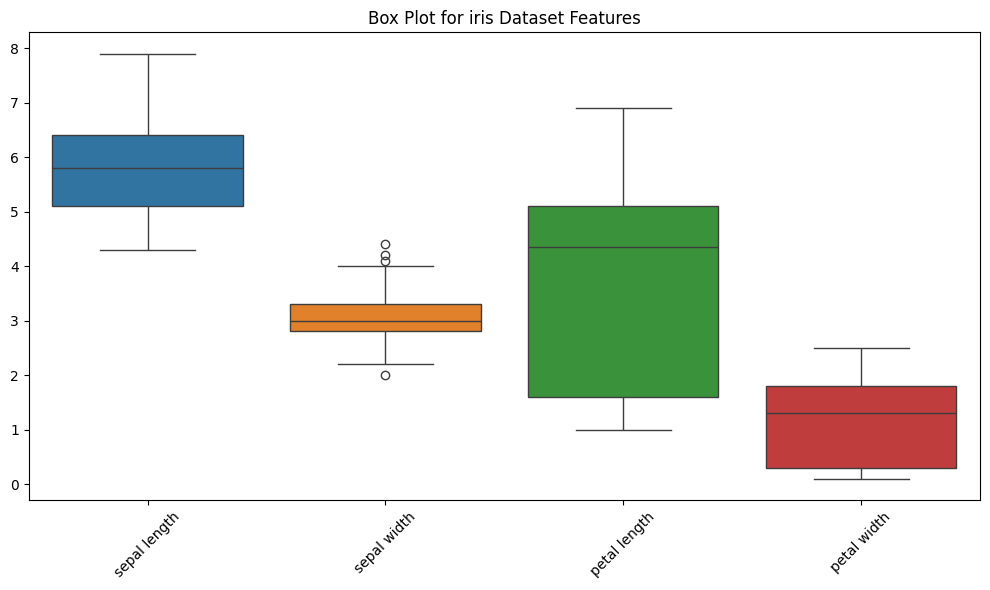

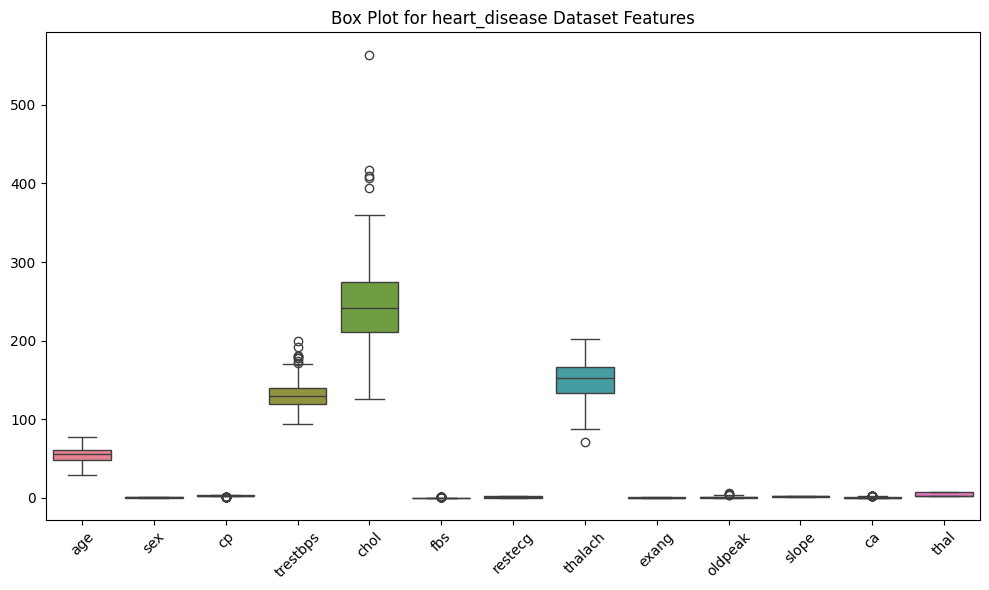

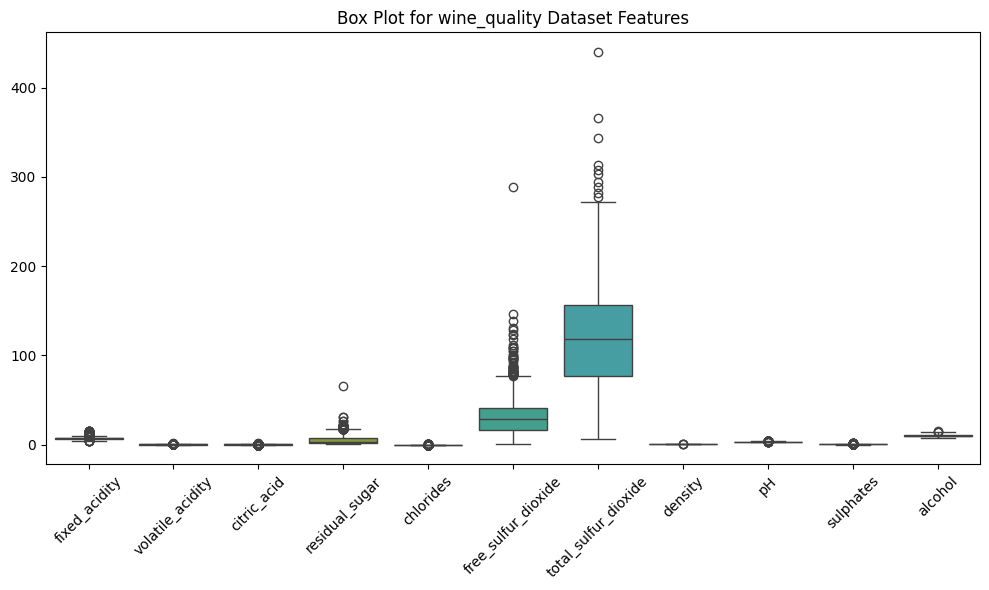

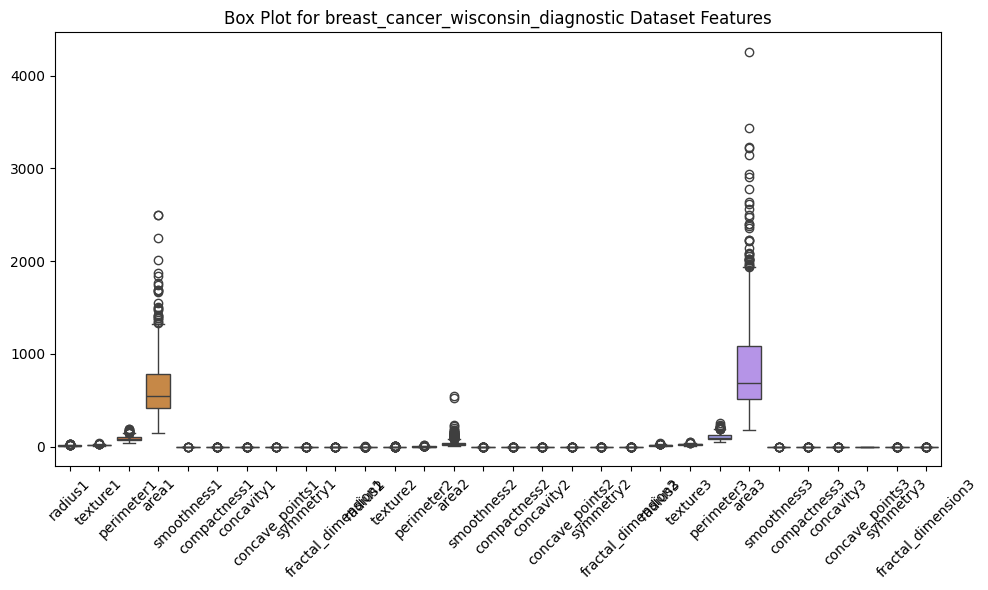

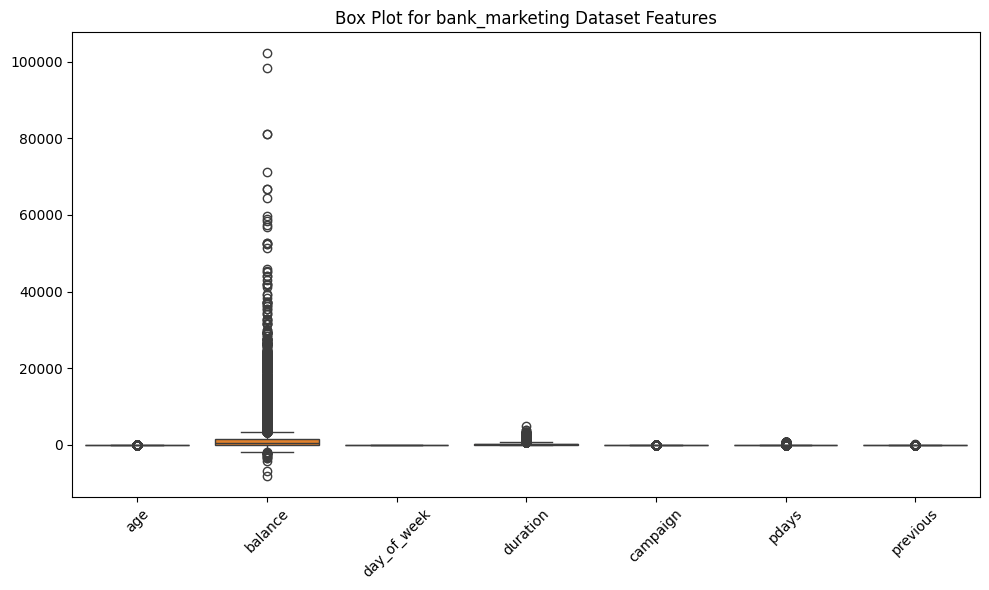

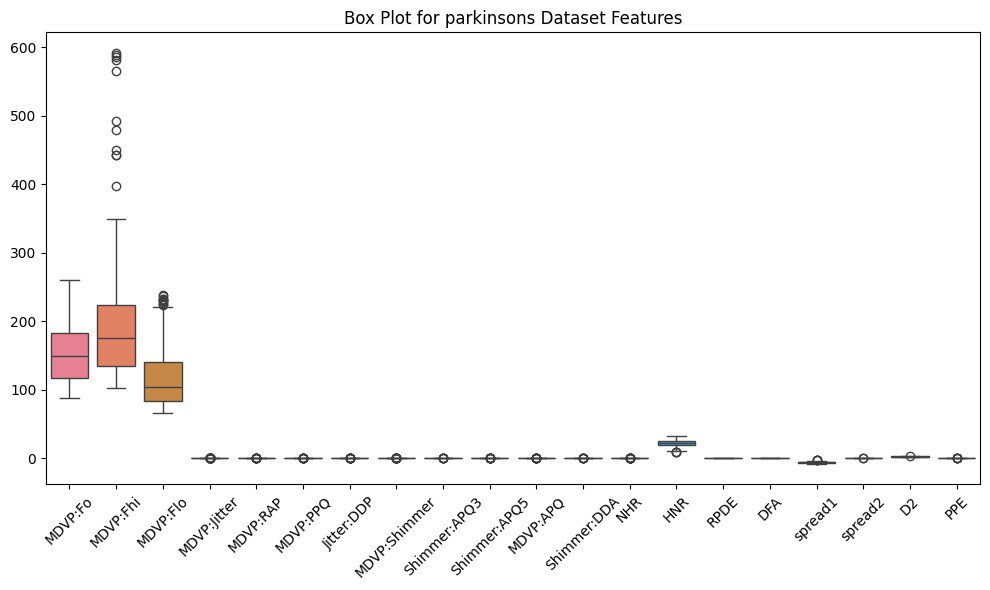

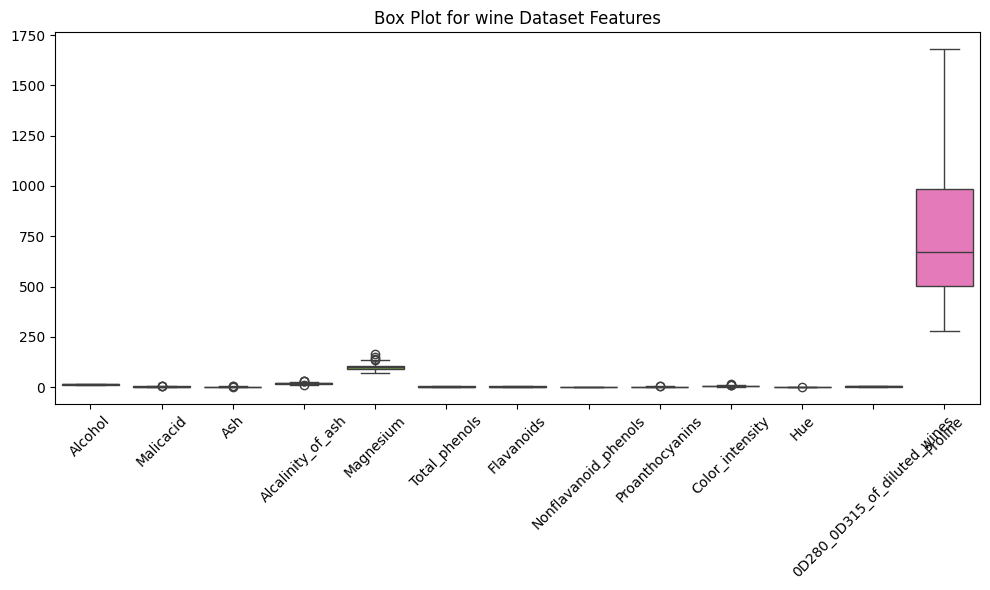

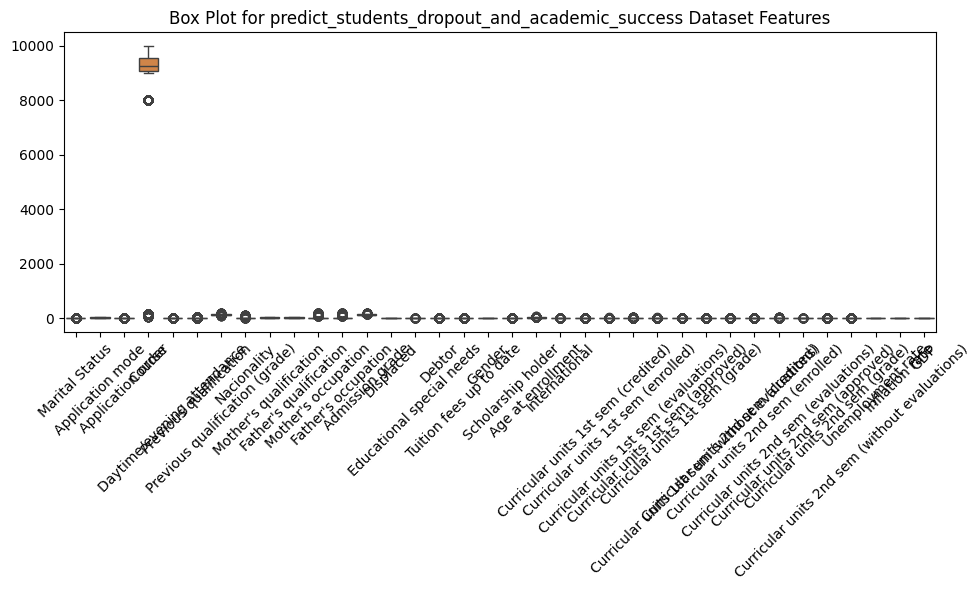

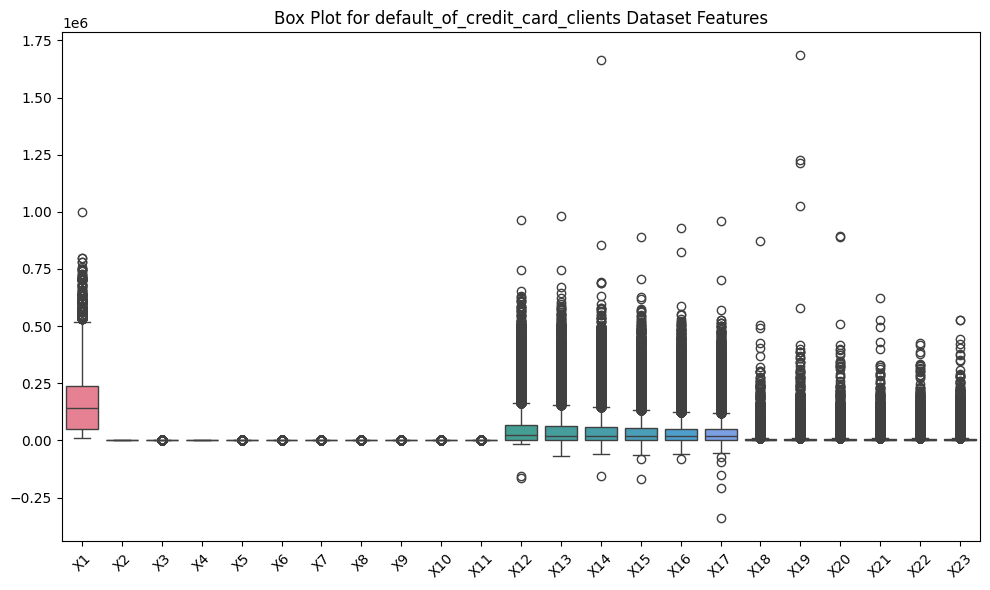

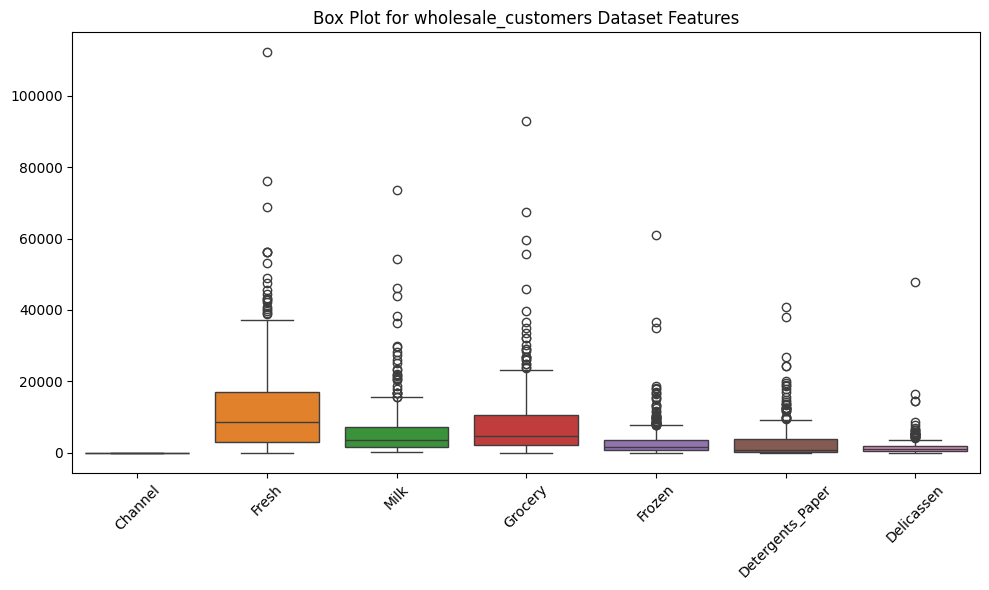

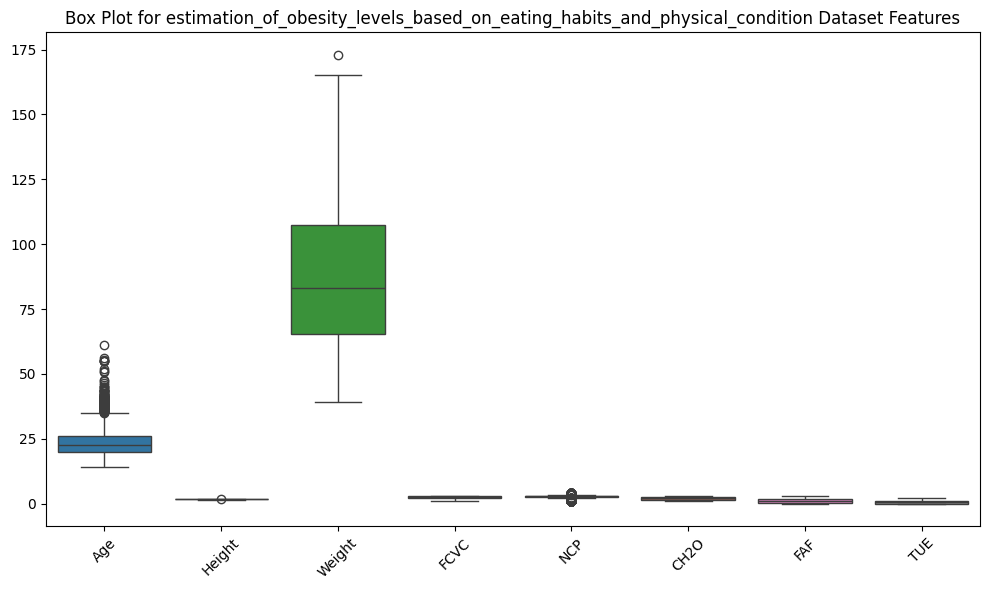

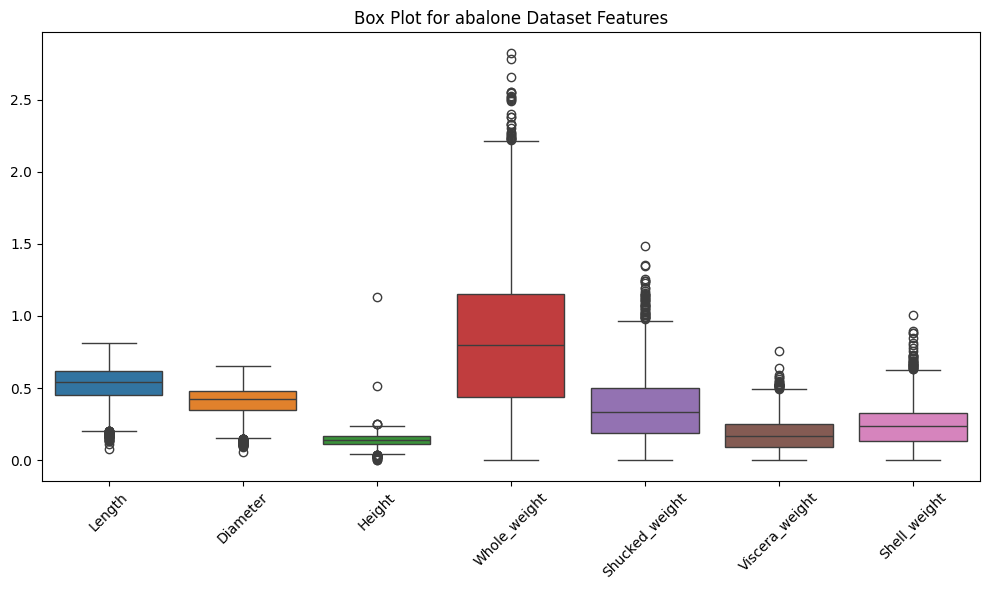

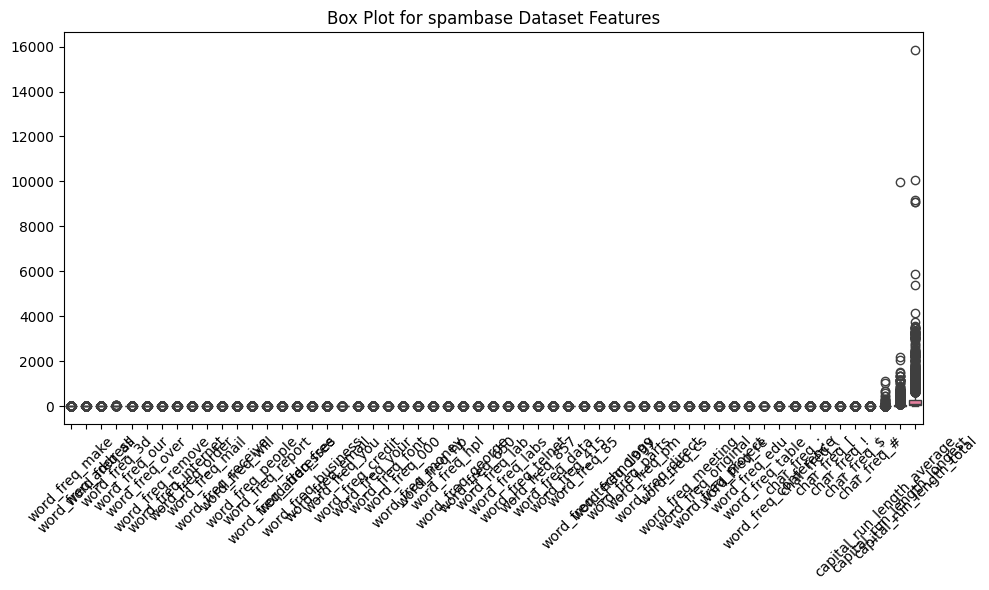

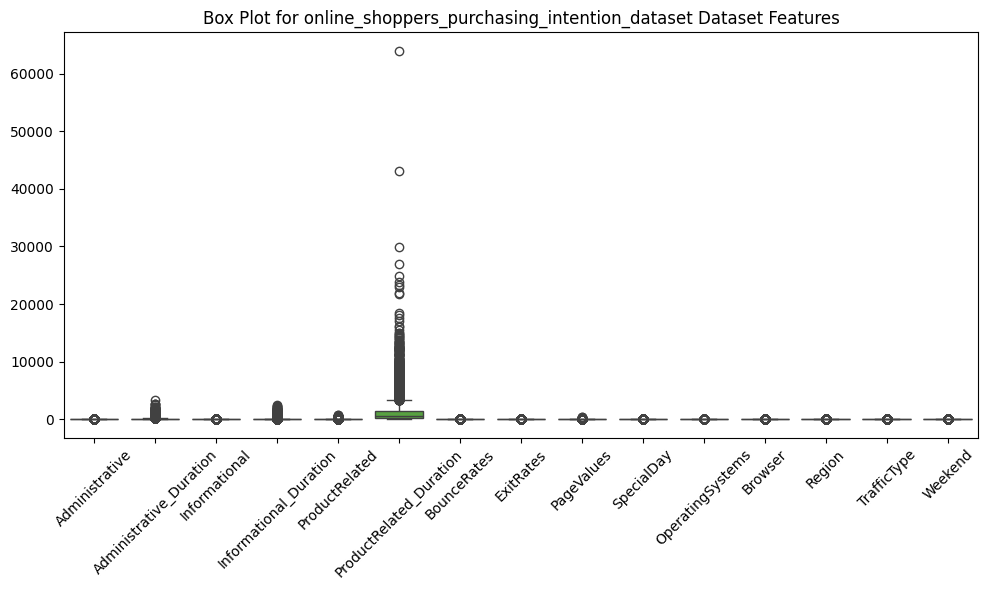

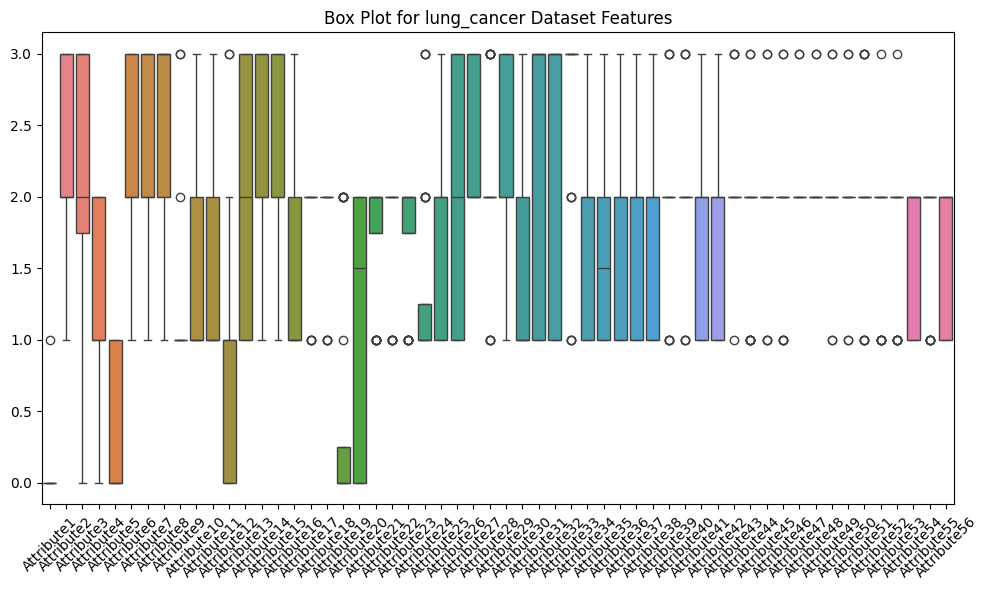

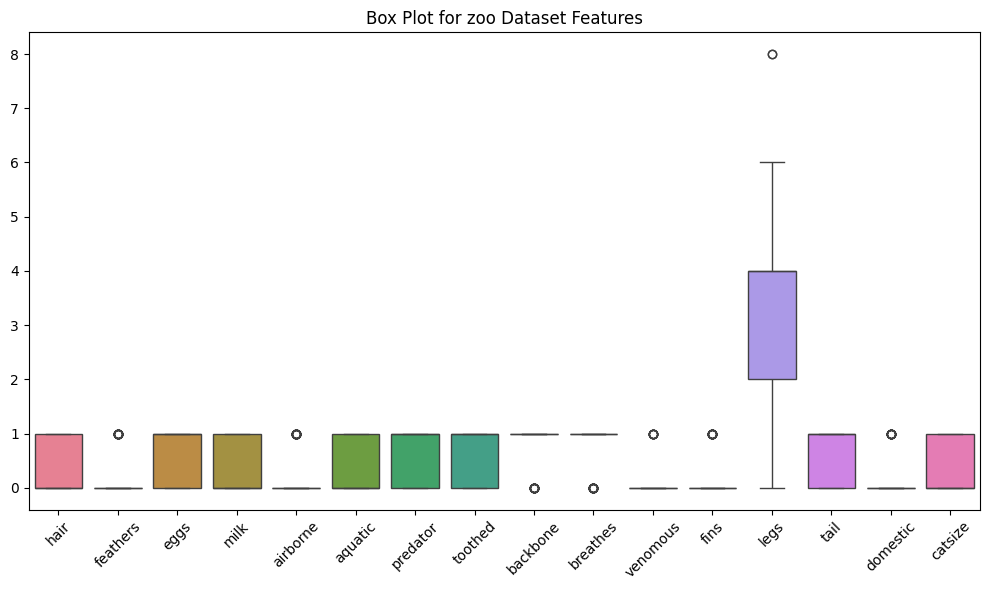

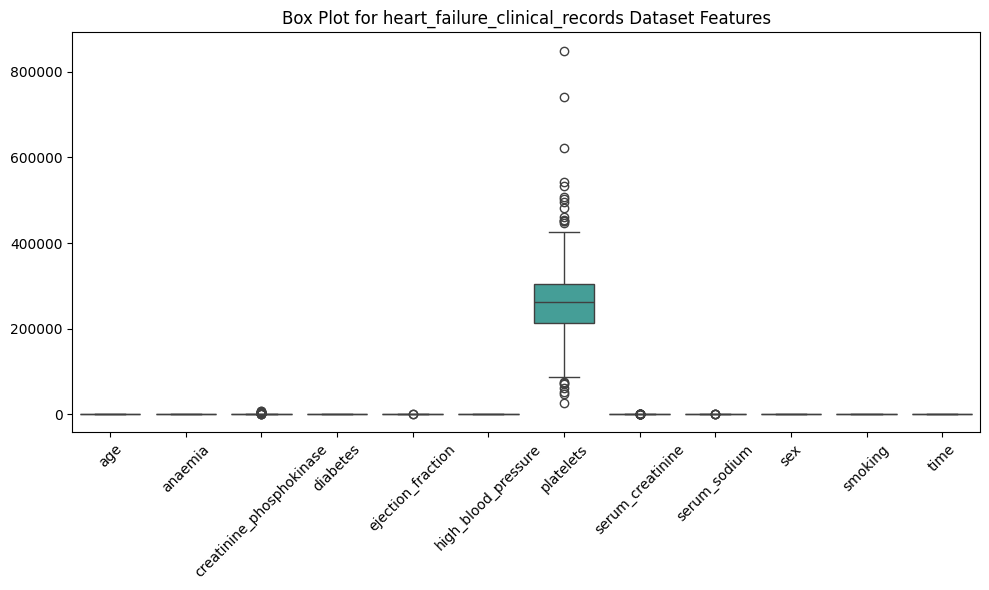

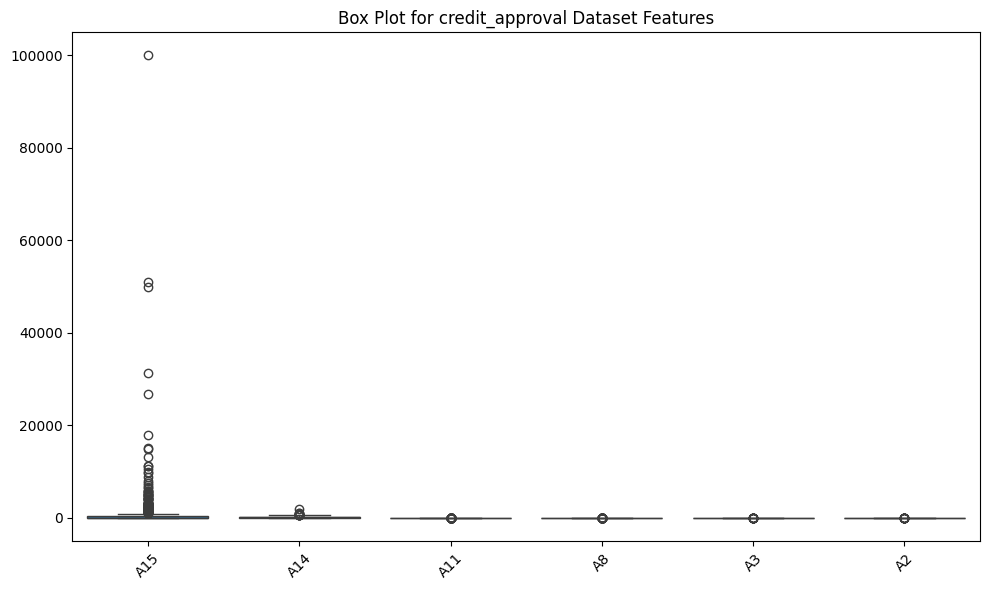

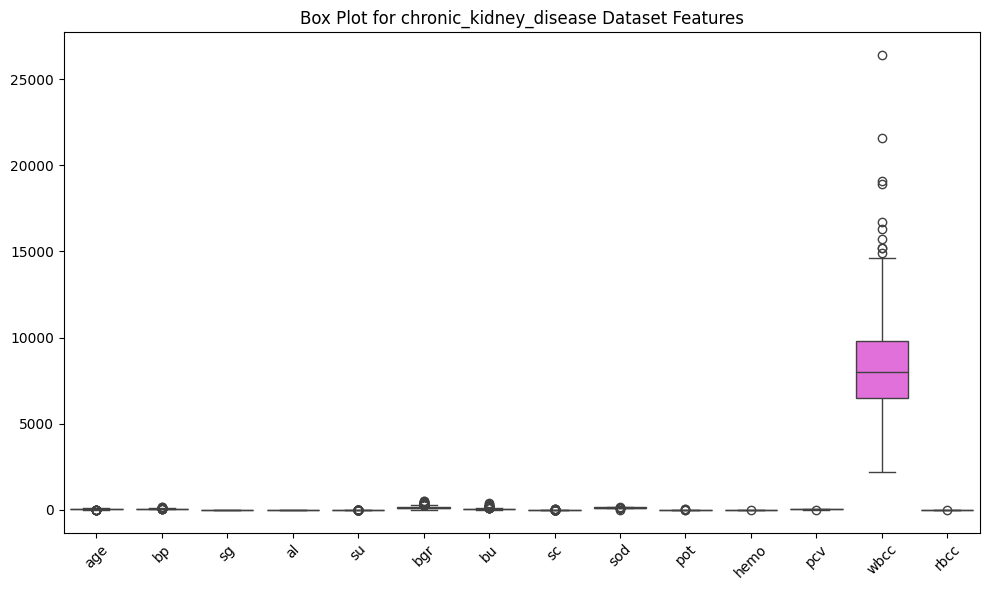

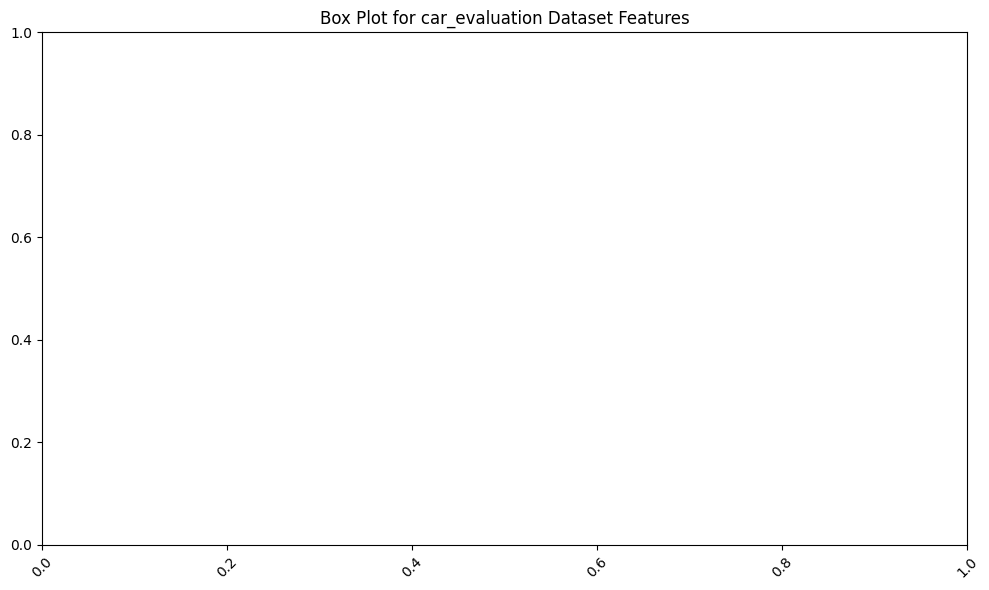

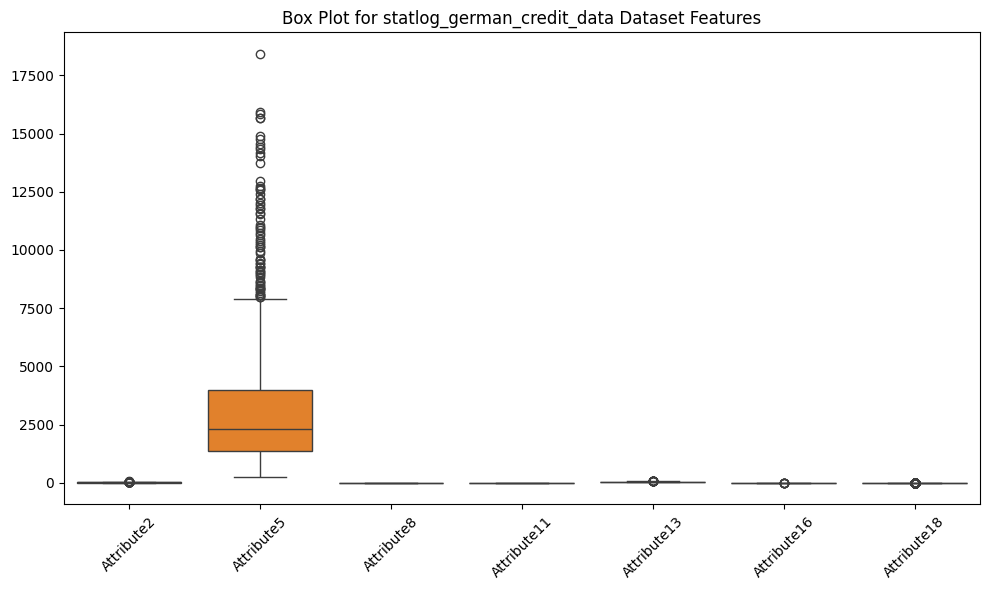

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


for name, dataset in datasets.items():
    try:
        data = dataset.data.features
        plt.figure(figsize=(10,6))
        sns.boxplot(data=data)
        plt.title(f'Box Plot for {name} Dataset Features')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create box plot for {name} dataset: {e}")


In [25]:
## DATA PREPROCESSING ##
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

data_sets_processed = {}
for name, dataset in datasets.items():

    X = dataset.data.features.copy()
    y = dataset.data.targets

    # ---- FIX TARGET ----
    if isinstance(y, pd.DataFrame):
        if y.shape[1] != 1:
            raise ValueError(
                f"{name}: multi-output target not supported by SVM"
            )
        y = y.iloc[:, 0]

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    # ---- CLEAN FEATURES ----
    X = X.replace('?', np.nan)

    num_cols = X.select_dtypes(exclude=['object']).columns
    cat_cols = X.select_dtypes(include=['object']).columns

    for col in num_cols:
        X[col] = X[col].fillna(X[col].median())

    X[cat_cols] = X[cat_cols].fillna("missing")

    if len(cat_cols) > 0:
        encoder = OrdinalEncoder(
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
        X[cat_cols] = encoder.fit_transform(X[cat_cols])

    # ---- SPLITS ----
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42
    )

    # ---- SCALE ----
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_val   = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
    X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    data_sets_processed[name] = {
        "X_train": X_train,
        "X_val": X_val,
        "X_test": X_test,
        "y_train": y_train,
        "y_val": y_val,
        "y_test": y_test
    }



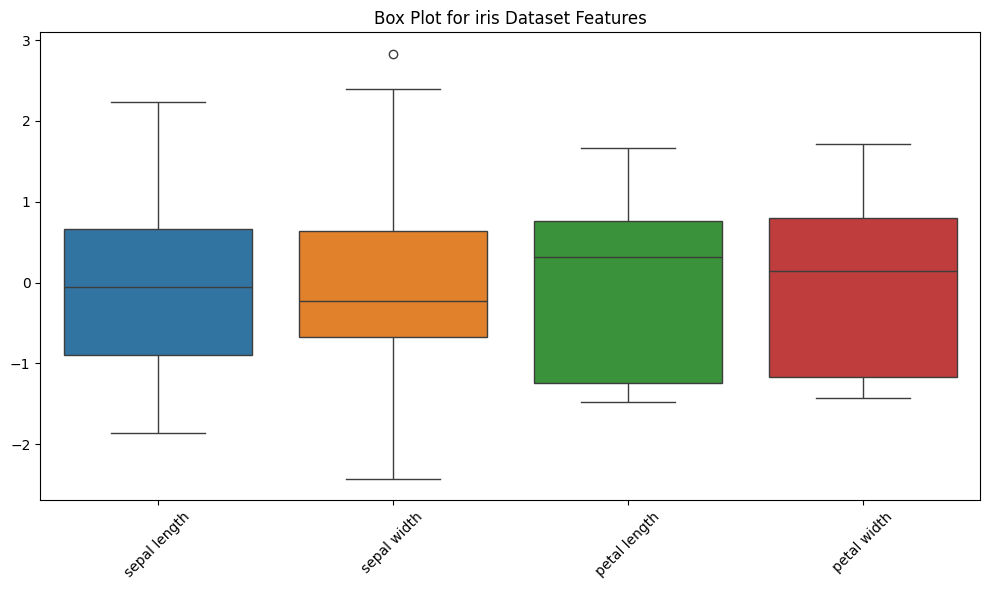

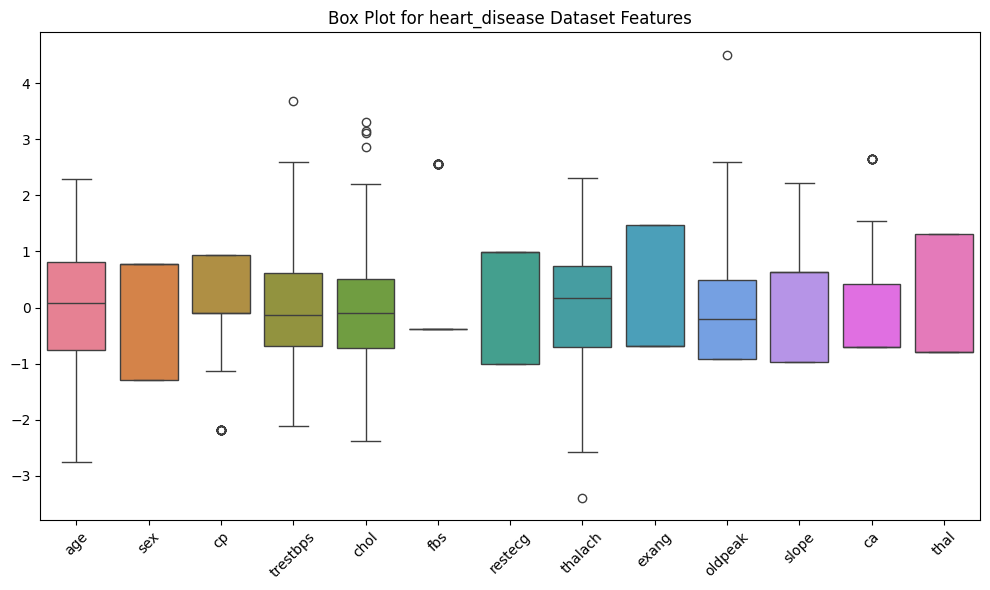

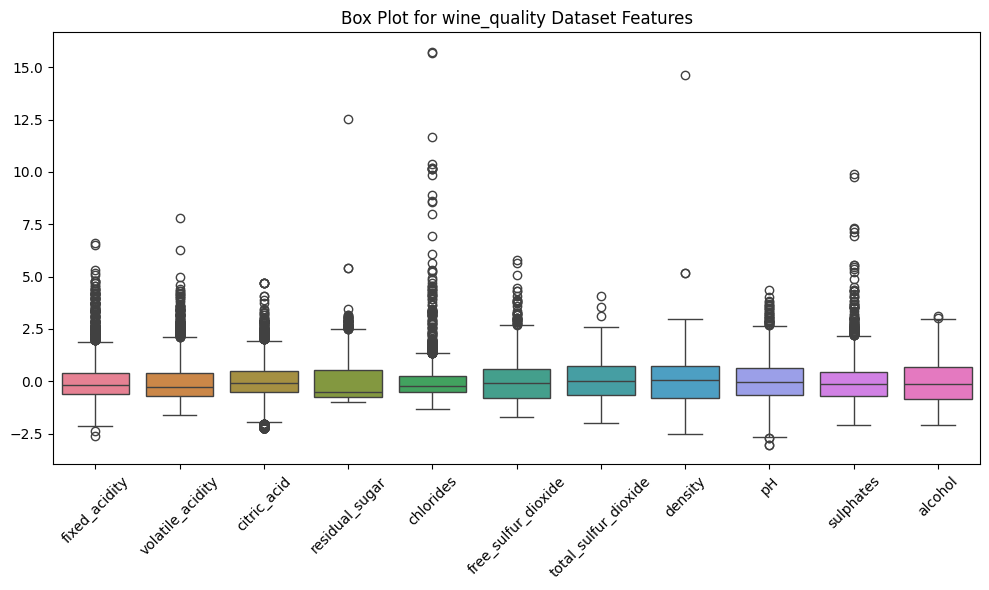

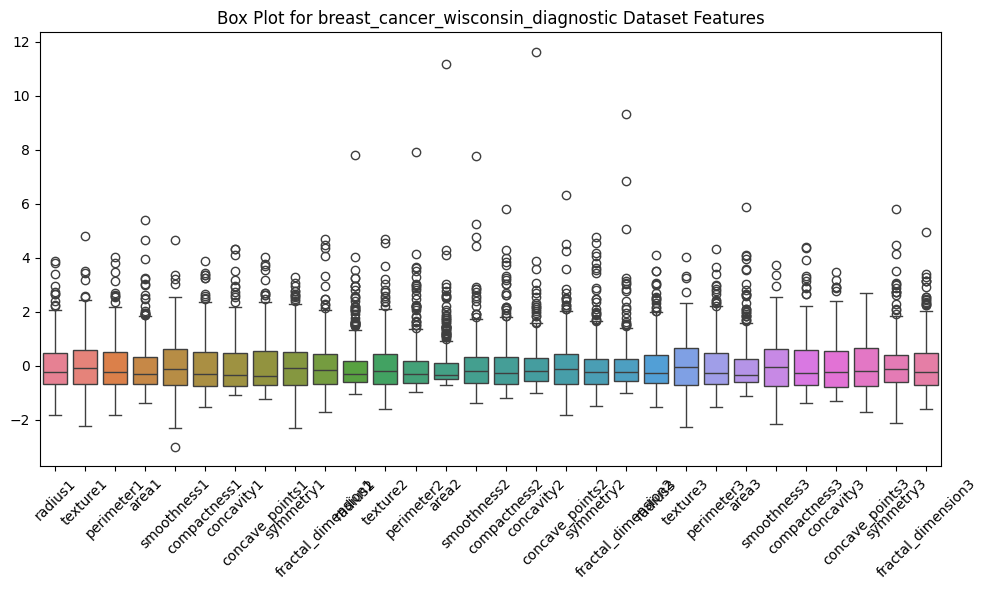

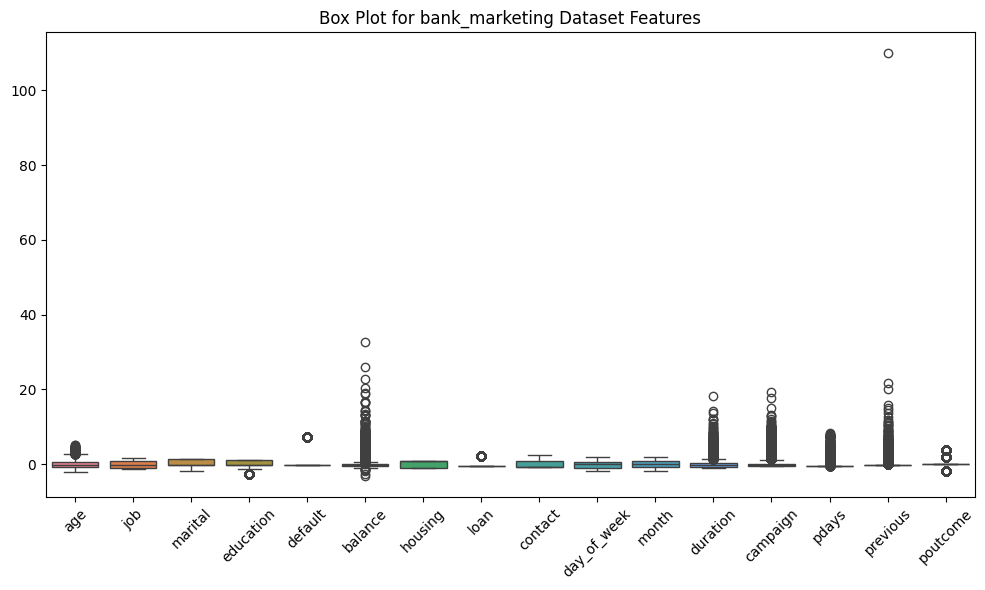

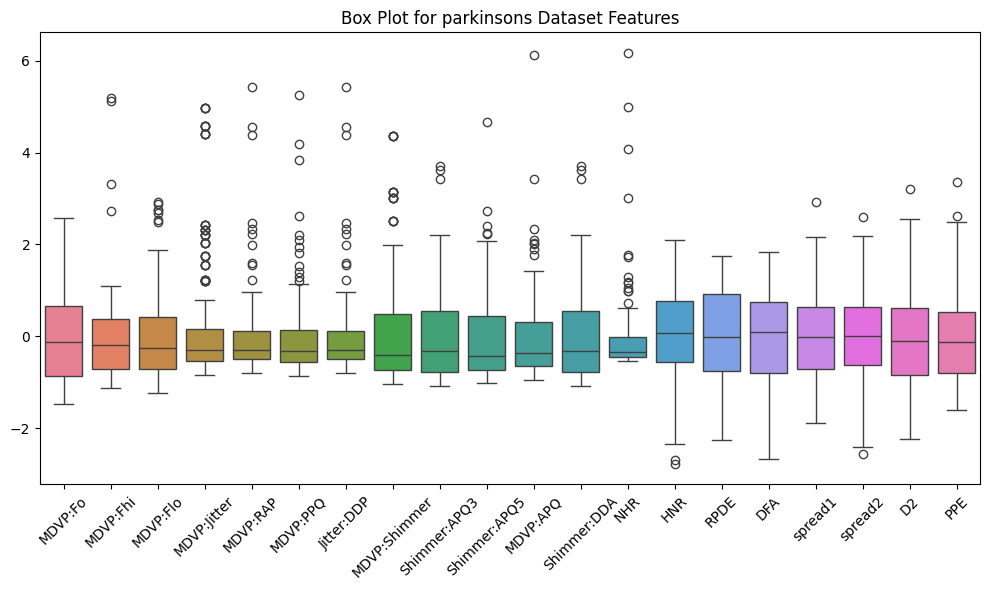

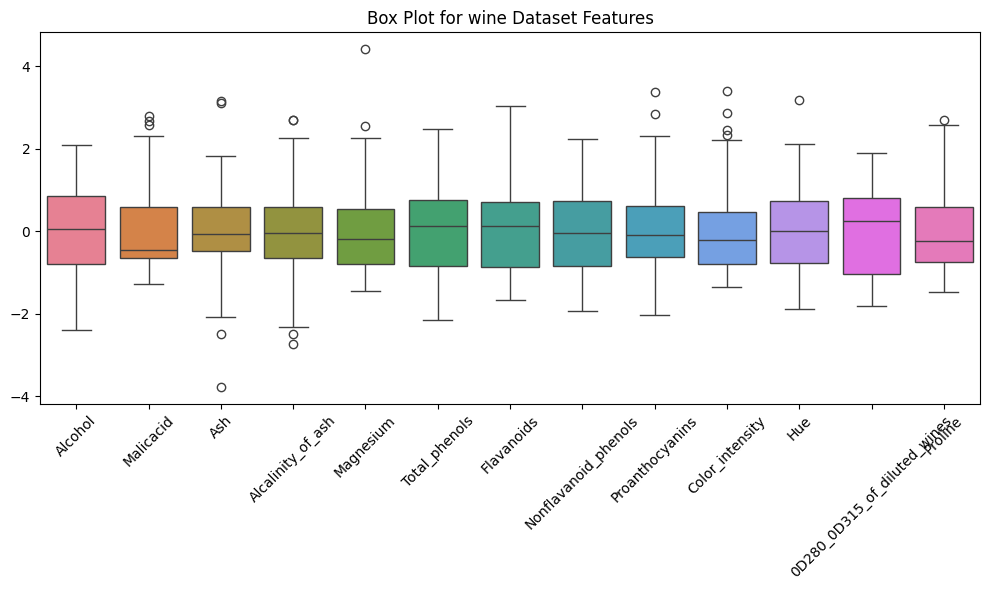

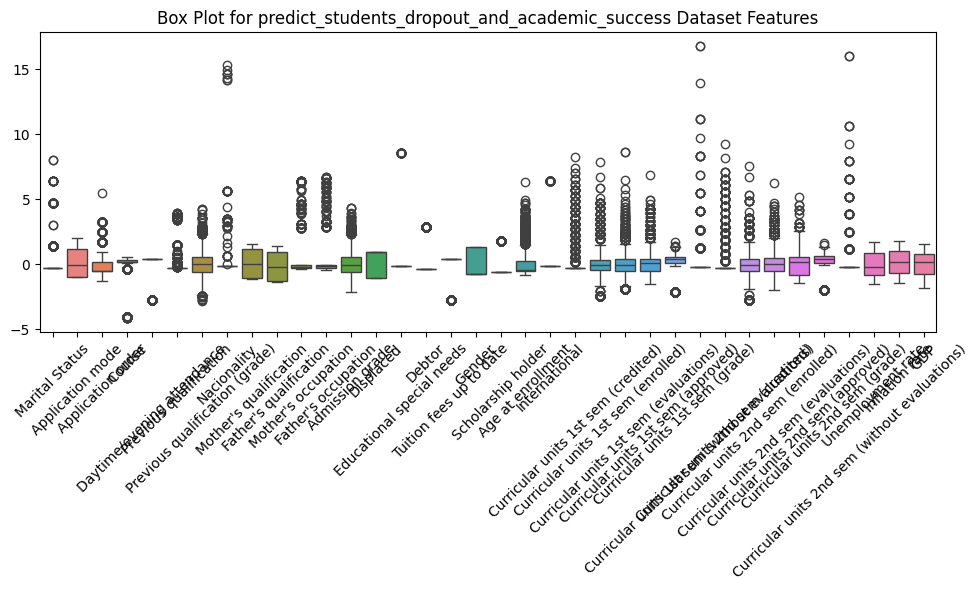

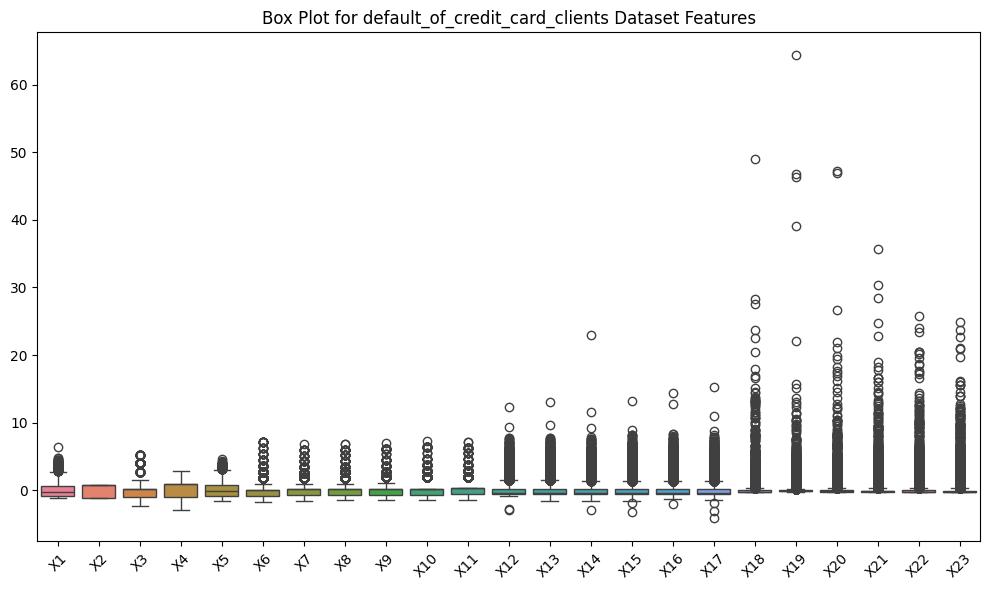

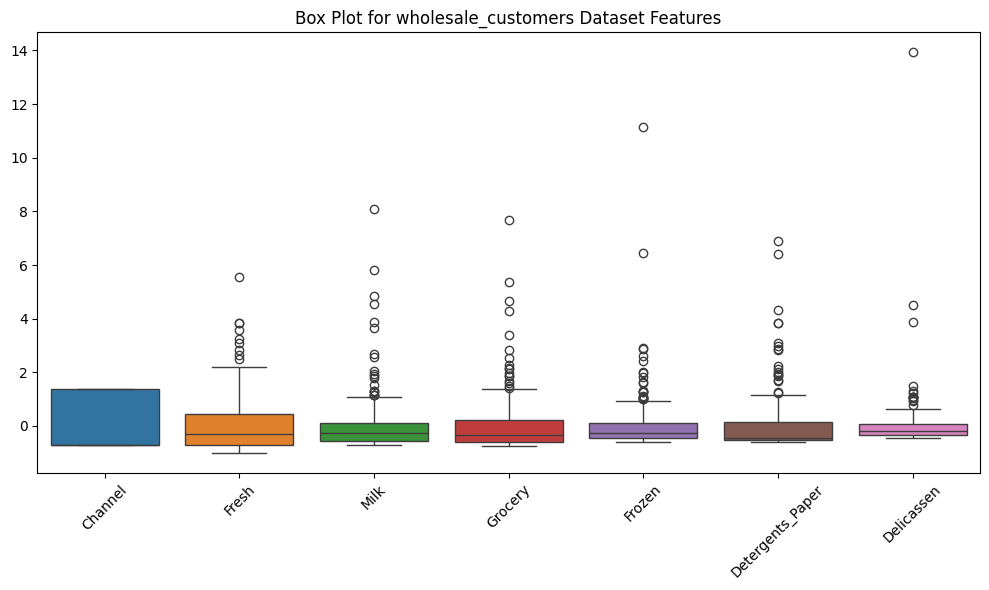

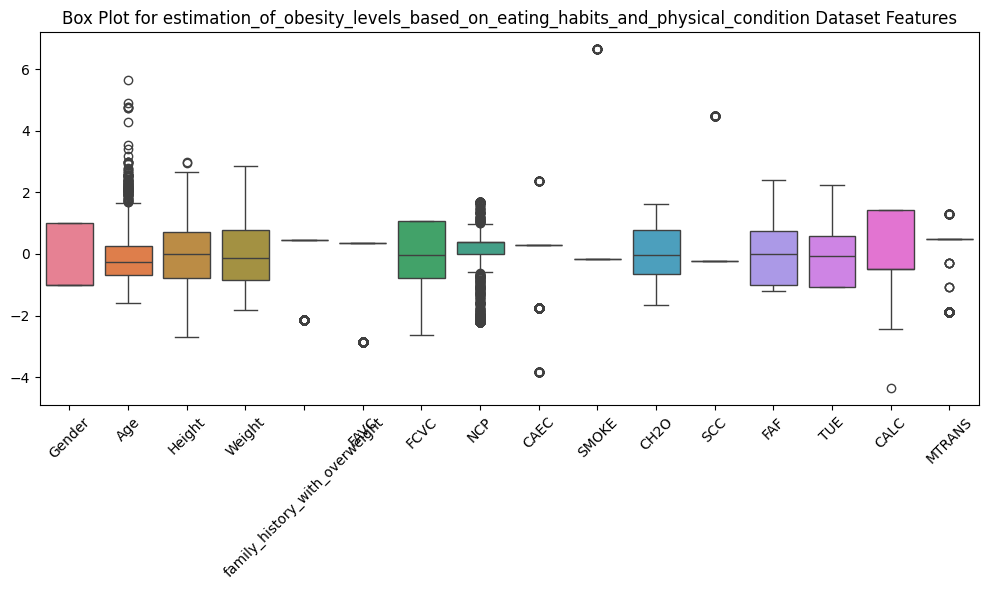

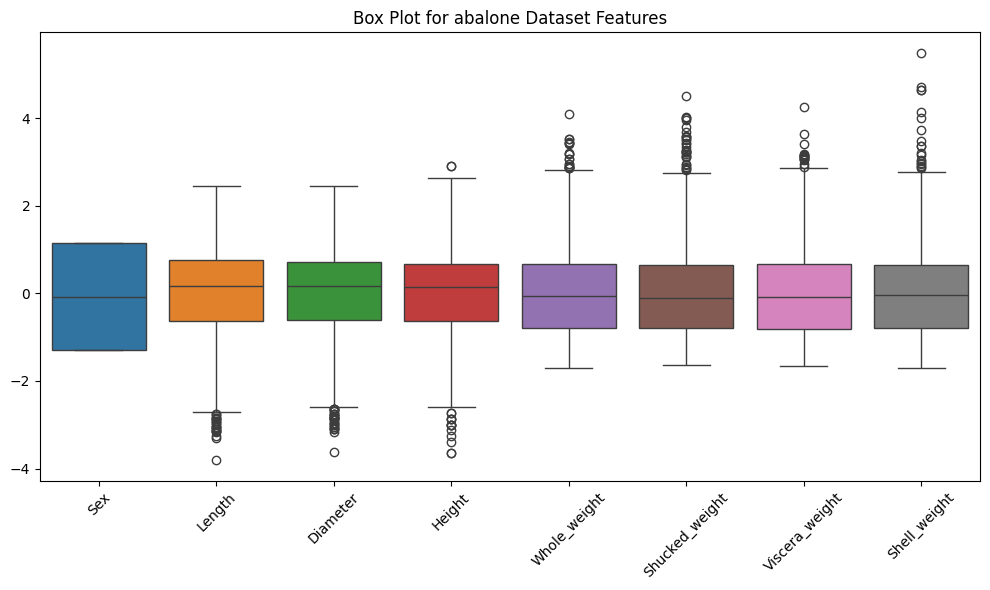

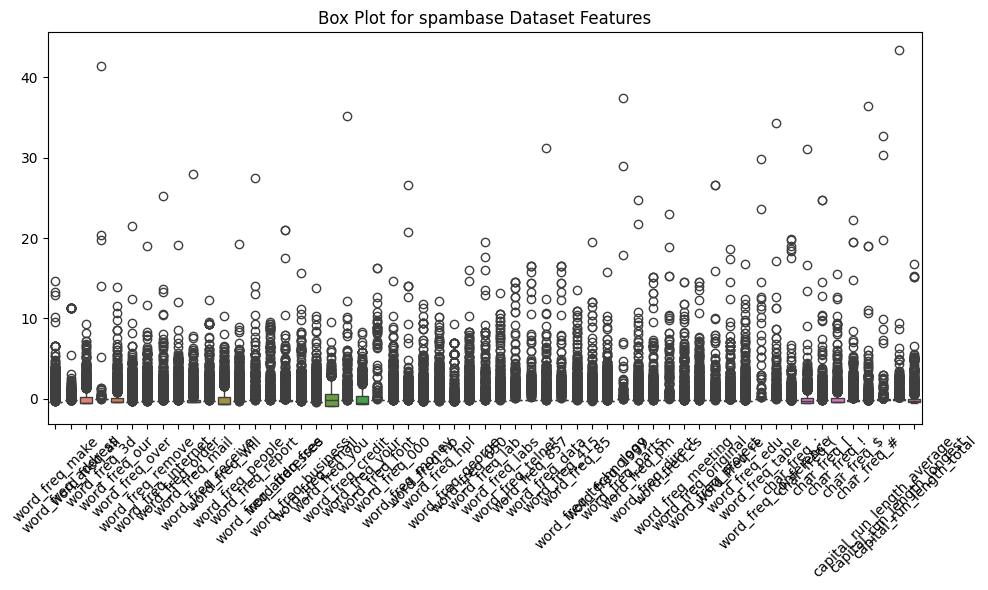

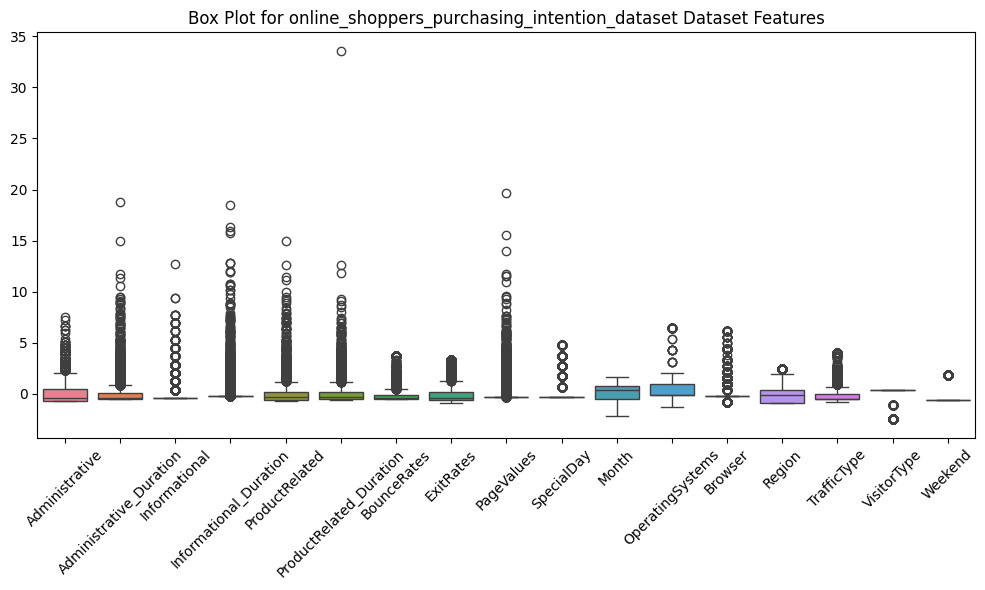

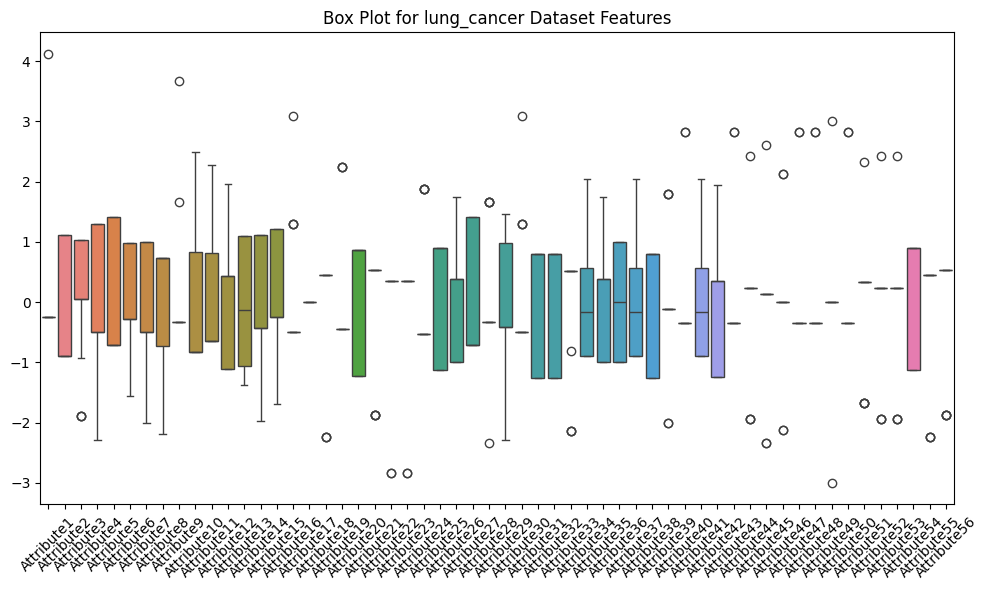

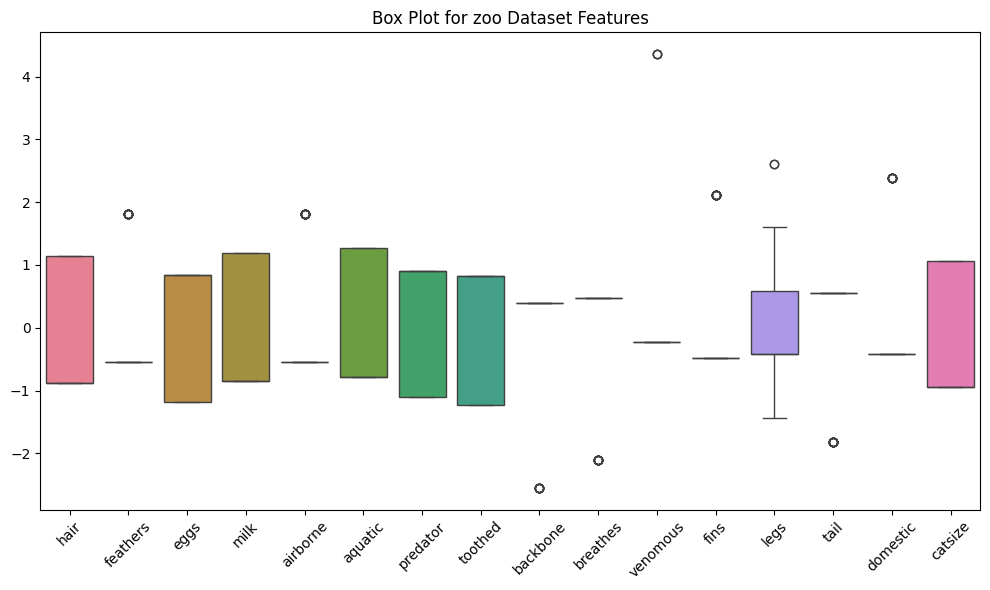

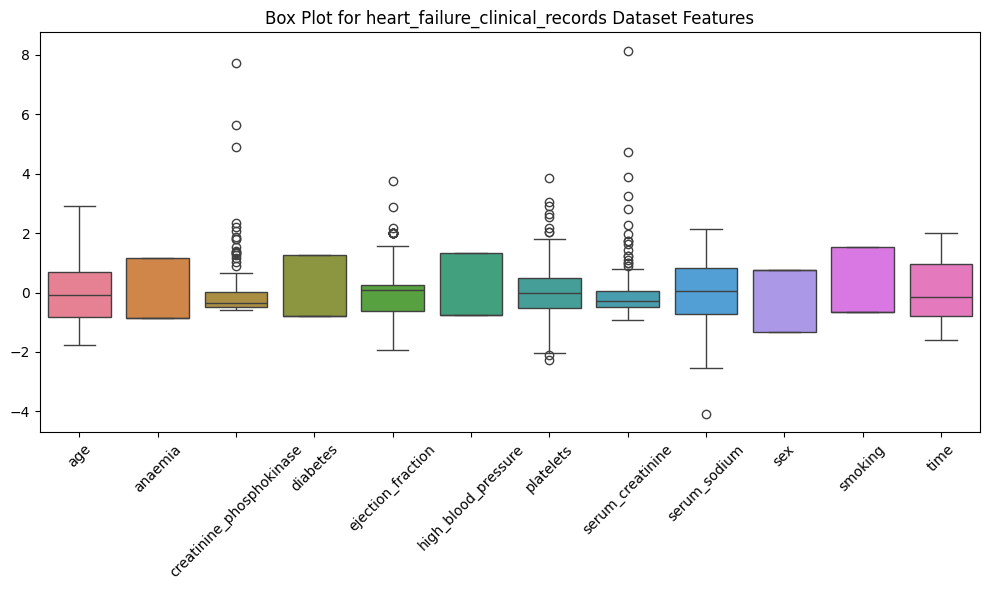

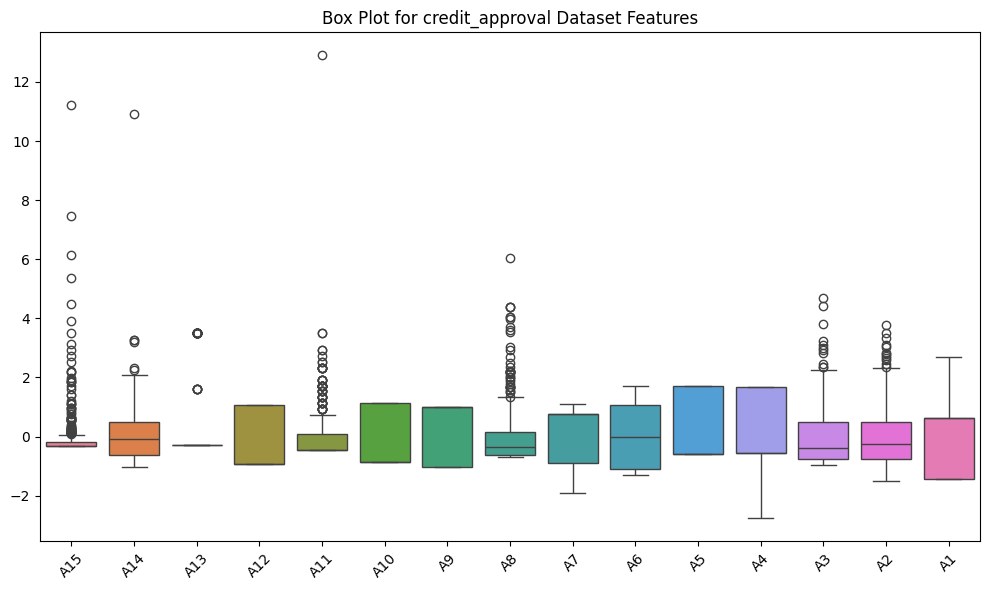

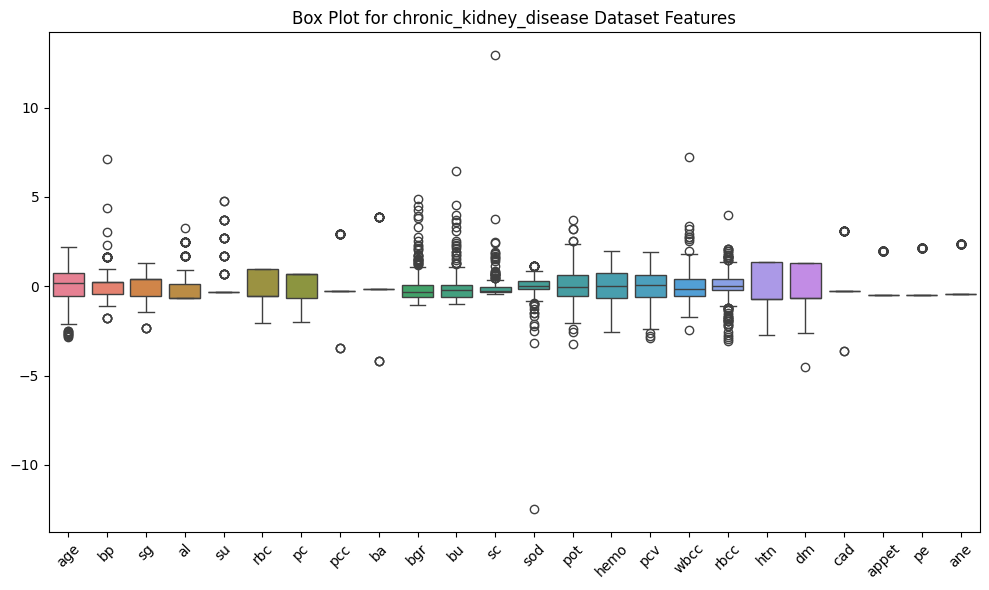

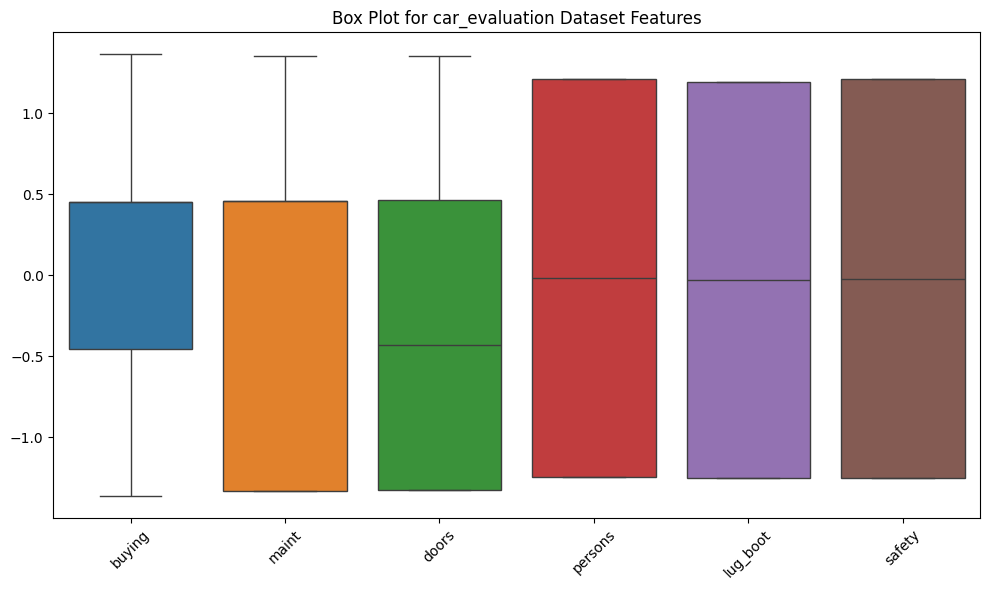

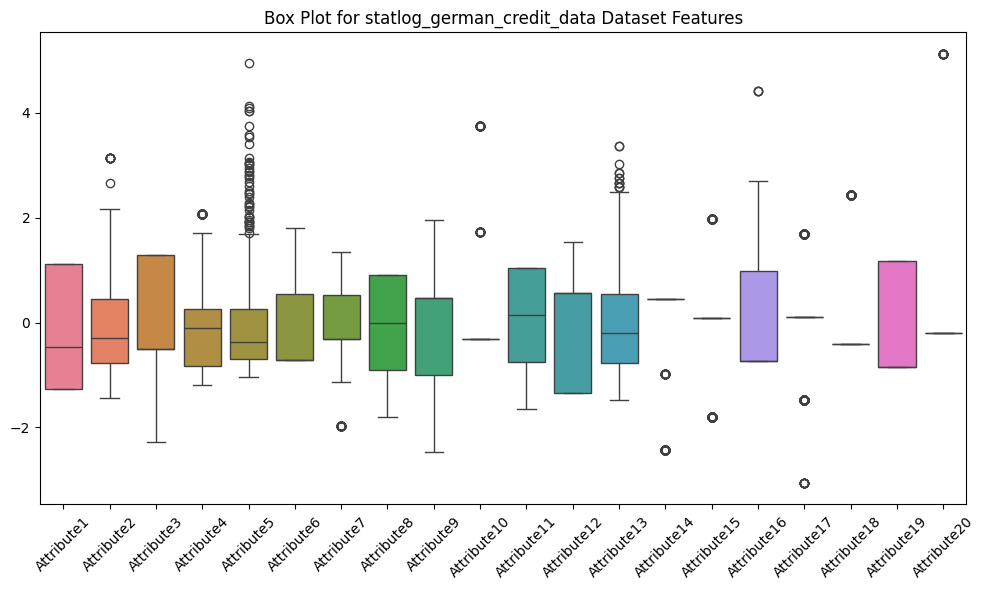

In [26]:

for name, dataset in data_sets_processed.items():
    try:
        data = dataset["X_train"]
        plt.figure(figsize=(10,6))
        sns.boxplot(data=data)
        plt.title(f'Box Plot for {name} Dataset Features')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create box plot for {name} dataset: {e}")


##  Models Supervised learning

In [27]:
import os
import json

def save_to_json(dataset_name, metrics):
    os.makedirs(metrics["name"], exist_ok=True)
    with open(
        f'{metrics["name"]}/dataset_{dataset_name}_metrics_{metrics["name"]}.json',
        'w'
    ) as f:
        json.dump(metrics, f, indent=2)


In [28]:
def learn_on_all_datasets(model_fn,data_sets_processed):
    results = {}
    for name, dataset in data_sets_processed.items():
        X_train = dataset["X_train"]
        y_train = dataset["y_train"]
        X_val = dataset["X_val"]
        y_val = dataset["y_val"]
        X_test = dataset["X_test"]
        y_test = dataset["y_test"]

        metrics = model_fn(X_train, y_train, X_val, y_val, X_test, y_test)
        
        results[name] = metrics
        save_to_json(name, metrics)
    return results

    

In [29]:
import glob
import json
import os
import matplotlib.pyplot as plt

def plot_accuracy_from_json():
    json_files = glob.glob('*/dataset_*_metrics_*.json')

    all_metrics = {}
    average_model_accuracies = {}

    for json_file in json_files:
        with open(json_file, 'r') as f:
            metrics = json.load(f)

        if 'test_accuracy' not in metrics:
            continue

        filename = os.path.basename(json_file)
        dataset_name = filename.replace('dataset_', '').split('_metrics_')[0]

        model_name = metrics['name']
        accuracy = metrics['test_accuracy']

        all_metrics.setdefault(dataset_name, {})[model_name] = accuracy
        average_model_accuracies.setdefault(model_name, []).append(accuracy)

    # Per-dataset plots
    for dataset_name, metrics in all_metrics.items():
        plt.figure()
        plt.bar(metrics.keys(), metrics.values())
        for i, v in enumerate(metrics.values()):
            plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
        plt.title(f'Accuracy for {dataset_name} Dataset')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Average model accuracy plot
    plt.figure()
    model_names = []
    avg_accuracies = []

    for model_name, accuracies in average_model_accuracies.items():
        model_names.append(model_name)
        avg_accuracies.append(sum(accuracies) / len(accuracies))

    plt.bar(model_names, avg_accuracies)
    for i, v in enumerate(avg_accuracies):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

    plt.title('Average Model Accuracies Across All Datasets')
    plt.ylabel('Average Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### SVM

In [30]:
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score

def model_SVM_rbf(X_train, y_train, X_val, y_val, X_test,y_test, multi_class_strategy='ovo'):
    if multi_class_strategy == 'ovo':
        classifier = OneVsOneClassifier(svm.SVC(kernel='rbf'))
    elif multi_class_strategy == 'ovr':
        classifier = OneVsRestClassifier(svm.SVC(kernel='rbf'))
    else:
        raise ValueError("multi_class_strategy must be 'ovo' or 'ovr'")
    X_train = X_train.values.reshape(X_train.shape[0], -1)
    y_train = y_train.values.ravel()
    X_val = X_val.values.reshape(X_val.shape[0], -1)
    y_val = y_val.values.ravel()
    X_test = X_test.values.reshape(X_test.shape[0], -1)
    y_test = y_test.values.ravel()
    classifier.fit(X_train, y_train)
    classifier_val_predictions = classifier.predict(X_val)
    classifier_test_predictions = classifier.predict(X_test)
    val_accuracy = accuracy_score(y_val, classifier_val_predictions)
    test_accuracy = accuracy_score(y_test, classifier_test_predictions)
    val_f1 = f1_score(y_val, classifier_val_predictions, average='weighted')
    test_f1 = f1_score(y_test, classifier_test_predictions, average='weighted')
    metrics = {
        "name": "SVM_rbf",
        "val_accuracy": val_accuracy,
        "test_accuracy": test_accuracy,
        "val_f1": val_f1,
        "test_f1": test_f1
    }
    return metrics

results_svm = learn_on_all_datasets(model_SVM_rbf, data_sets_processed)


### KNN


In [31]:
def rmse_distance(a, b):
    return np.sqrt(np.mean((a - b) ** 2, axis=1))


def predict_KNN(Xtest, Xtrain, Ltrain, distanceFunction, k=5):
    num_test = Xtest.shape[0]
    Lpred = np.empty(num_test, dtype=Ltrain.dtype)

    Xtest = Xtest.astype(np.float32, copy=False)
    Xtrain = Xtrain.astype(np.float32, copy=False)

    for i in range(num_test):
        distances = distanceFunction(Xtrain, Xtest[i])
        k_idx = np.argsort(distances)[:k]

        # vote + distance-based tie-break
        votes = {}
        for idx in k_idx:
            label = Ltrain[idx]
            votes.setdefault(label, []).append(distances[idx])

        # choose label with most votes, then smallest mean distance
        Lpred[i] = sorted(
            votes.items(),
            key=lambda x: (-len(x[1]), np.mean(x[1]))
        )[0][0]

    return Lpred


def KFolds_CrossValidation(X, L, distanceFunction, possible_K=[1,2,3,4,5], num_folds=3):
    n = X.shape[0]
    index = np.arange(n)
    np.random.shuffle(index)
    fold_size = n // num_folds

    accuracies = {K: [] for K in possible_K}

    for fold in range(num_folds):
        start = fold * fold_size
        end = start + fold_size

        test_idx = index[start:end]
        train_idx = np.concatenate((index[:start], index[end:]))

        X_train = X[train_idx]
        L_train = L[train_idx]
        X_test = X[test_idx]
        L_test = L[test_idx]

        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        for current_k in possible_K:
            L_pred = predict_KNN(X_test_flat, X_train_flat, L_train, distanceFunction, k=current_k)
            acc = np.mean(L_pred == L_test)
            accuracies[current_k].append(acc)

    avg_acc = {K: np.mean(v) for K, v in accuracies.items()}
    best_K = max(avg_acc, key=avg_acc.get)

    return best_K, avg_acc[best_K]

def model_knn(X_train, y_train, X_val, y_val, X_test,y_test, possible_K=[1,2,3,4,5]):
    best_K, _ = KFolds_CrossValidation(X_train.values, y_train.values.ravel(), rmse_distance, possible_K=possible_K, num_folds=3)

 
    y_train_1d = y_train.values.ravel()

    X_train_np = X_train.values
    X_val_np   = X_val.values
    X_test_np  = X_test.values
    X_train_np = X_train_np.reshape(X_train_np.shape[0], -1)
    X_val_np   = X_val_np.reshape(X_val_np.shape[0], -1)
    X_test_np  = X_test_np.reshape(X_test_np.shape[0], -1)

    y_val_pred = predict_KNN(
        X_val_np, X_train_np, y_train_1d, rmse_distance, k=best_K
    )

    y_test_pred = predict_KNN(
        X_test_np, X_train_np, y_train_1d, rmse_distance, k=best_K
    )

    val_accuracy = accuracy_score(y_val.values.ravel(), y_val_pred)
    test_accuracy = accuracy_score(y_test.values.ravel(), y_test_pred)
    val_f1 = f1_score(y_val.values.ravel(), y_val_pred, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_test_pred, average='weighted')

    metrics = {
        "name": "KNN",
        "best_K": best_K,
        "val_accuracy": val_accuracy,
        "test_accuracy": test_accuracy,
        "val_f1": val_f1,
        "test_f1": test_f1
    }
    return metrics

results_knn = learn_on_all_datasets(model_knn, data_sets_processed)


### Random Forest

In [33]:
def model_random_forest(X_train, y_train, X_val, y_val, X_test,y_test):
    from sklearn.ensemble import RandomForestClassifier

    classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    X_train = X_train.values.reshape(X_train.shape[0], -1)
    y_train = y_train.values.ravel()
    X_val = X_val.values.reshape(X_val.shape[0], -1)
    y_val = y_val.values.ravel()
    X_test = X_test.values.reshape(X_test.shape[0], -1)
    y_test = y_test.values.ravel()

    classifier.fit(X_train, y_train)

    classifier_val_predictions = classifier.predict(X_val)
    classifier_test_predictions = classifier.predict(X_test)

    val_accuracy = accuracy_score(y_val, classifier_val_predictions)
    test_accuracy = accuracy_score(y_test, classifier_test_predictions)
    val_f1 = f1_score(y_val, classifier_val_predictions, average='weighted')
    test_f1 = f1_score(y_test, classifier_test_predictions, average='weighted')

    metrics = {
        "name": "Random_Forest",
        "val_accuracy": val_accuracy,
        "test_accuracy": test_accuracy,
        "val_f1": val_f1,
        "test_f1": test_f1
    }
    return metrics

results_rf = learn_on_all_datasets(model_random_forest, data_sets_processed)

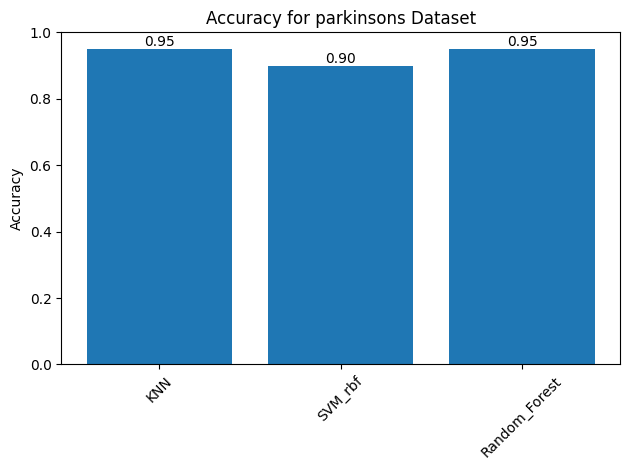

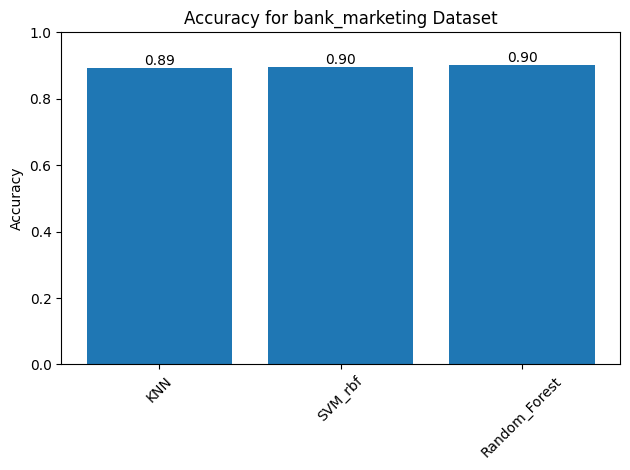

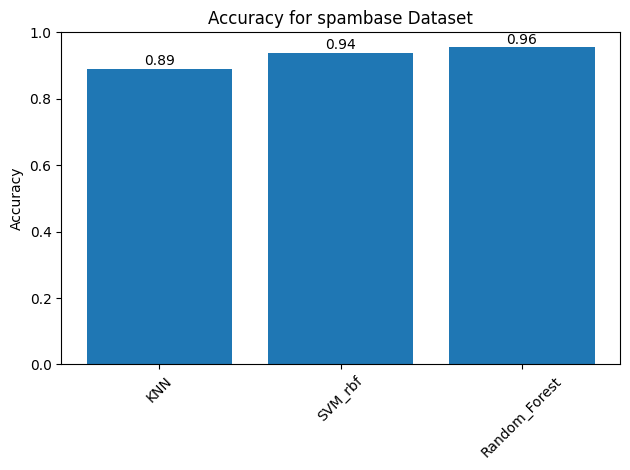

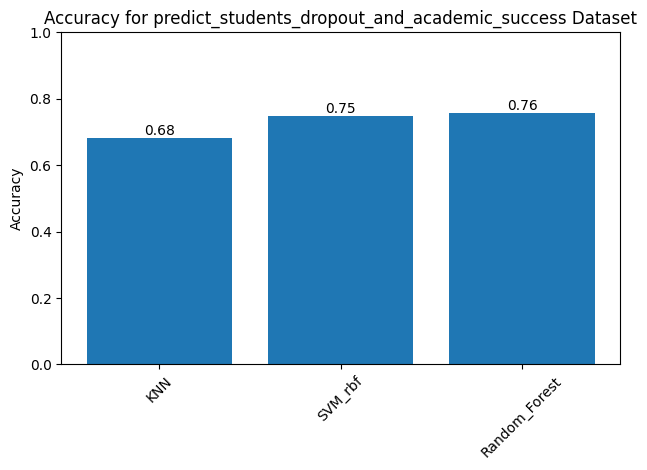

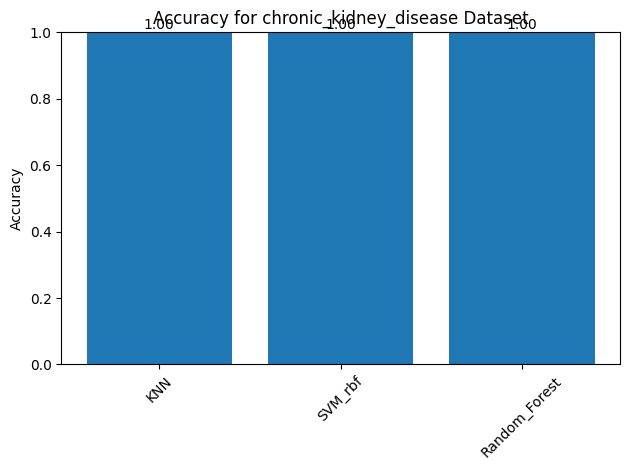

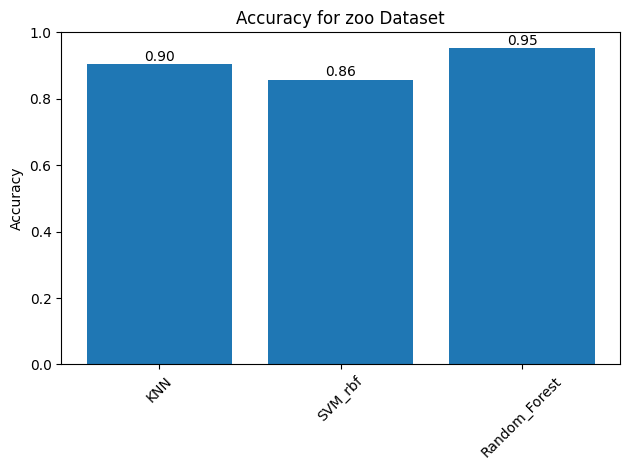

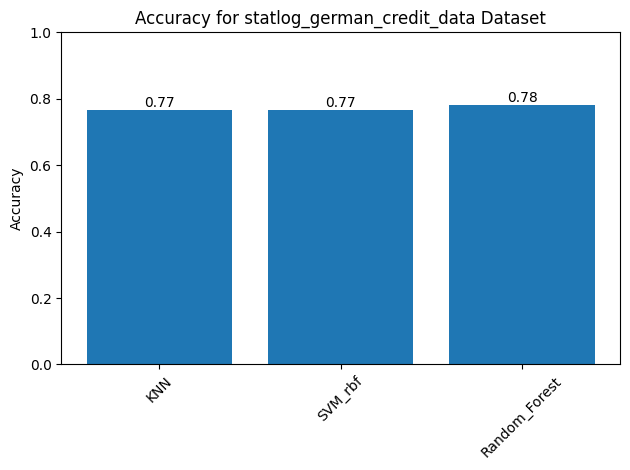

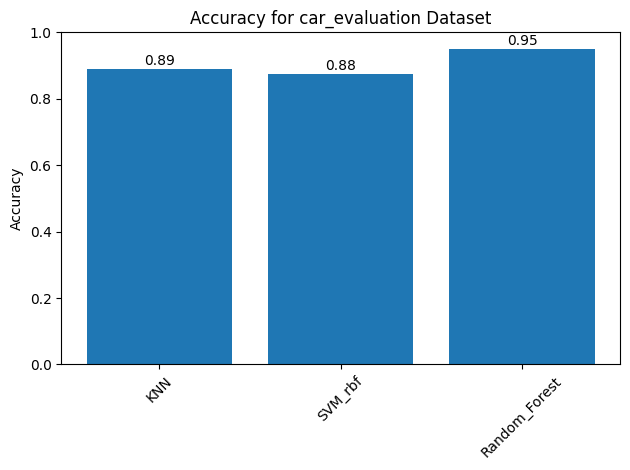

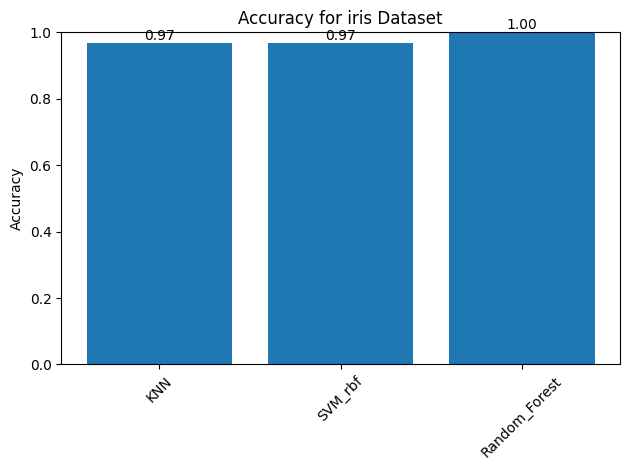

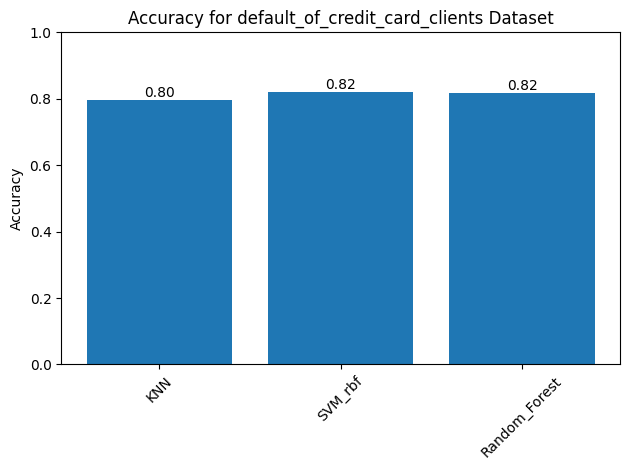

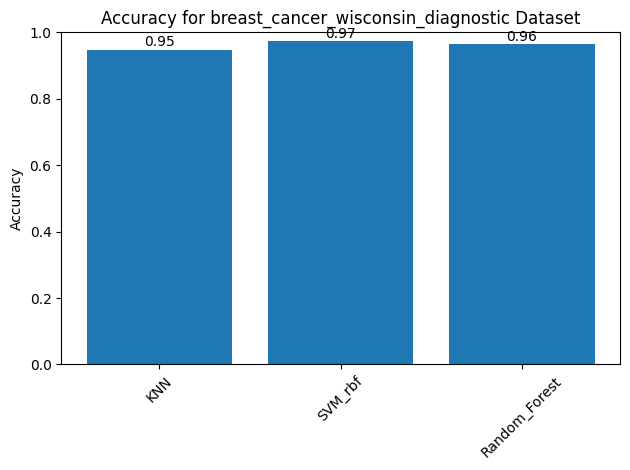

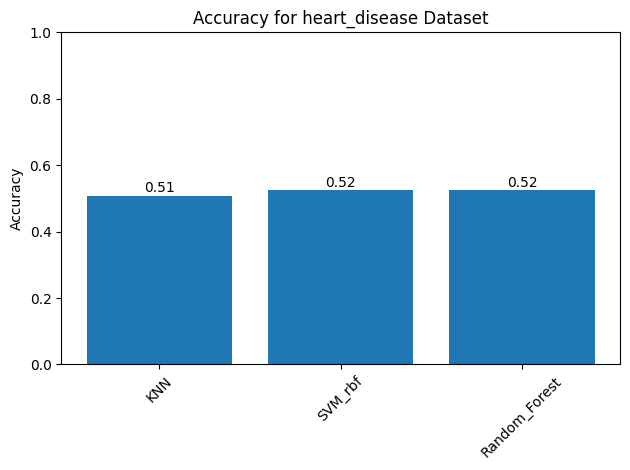

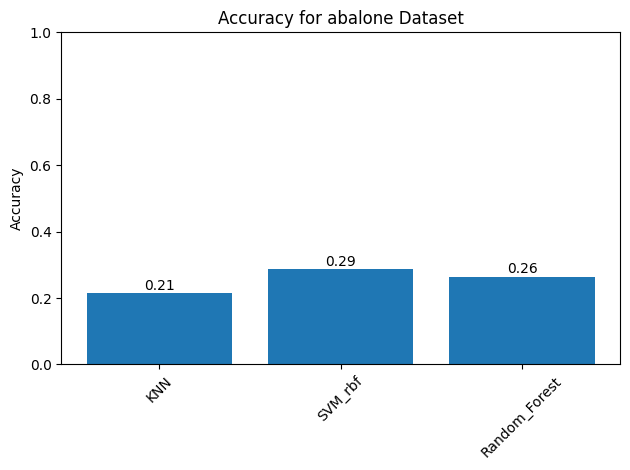

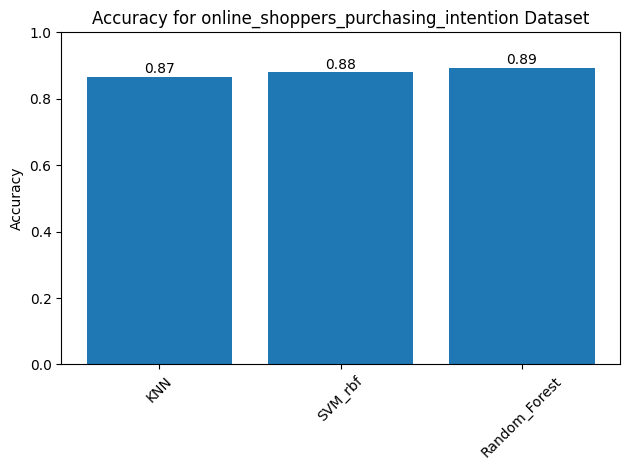

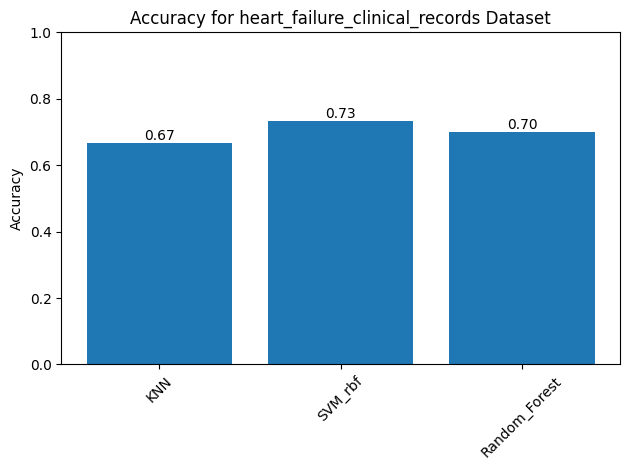

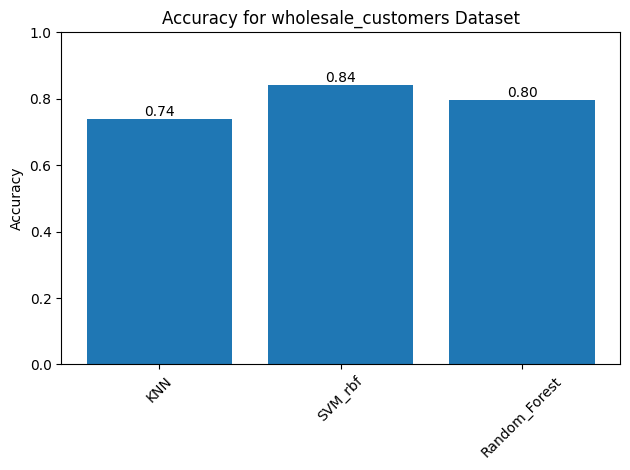

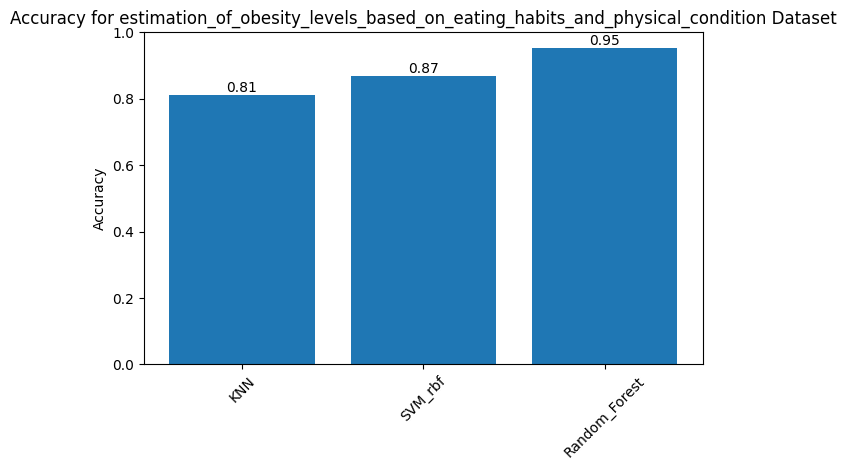

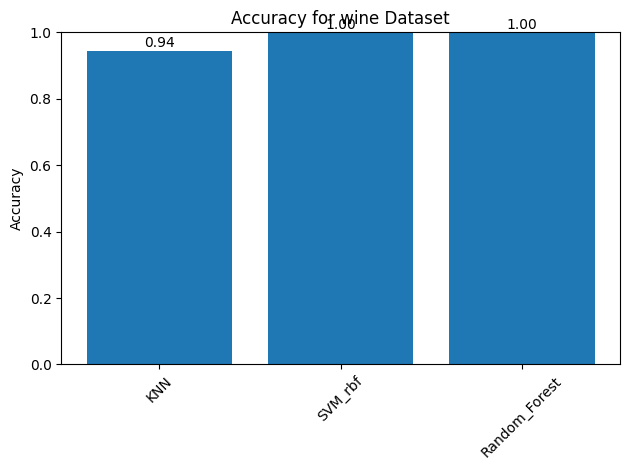

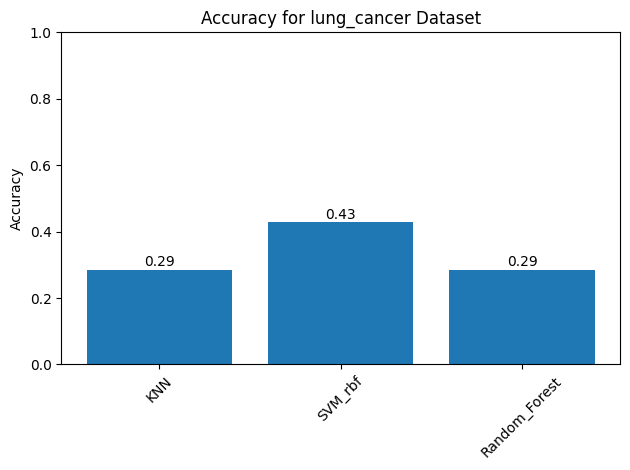

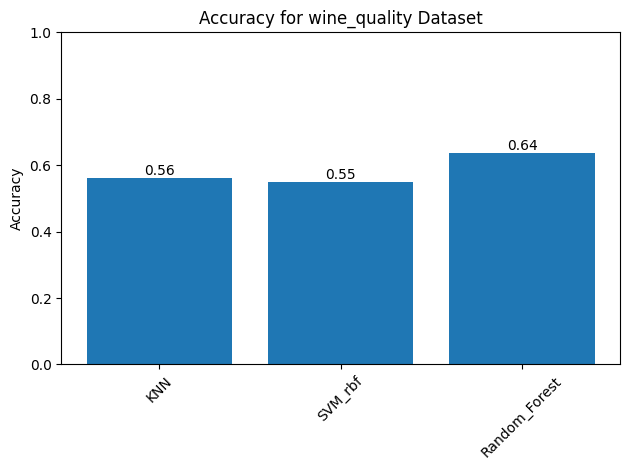

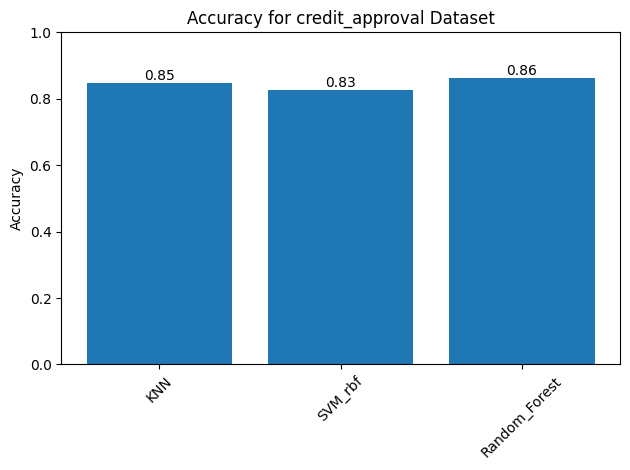

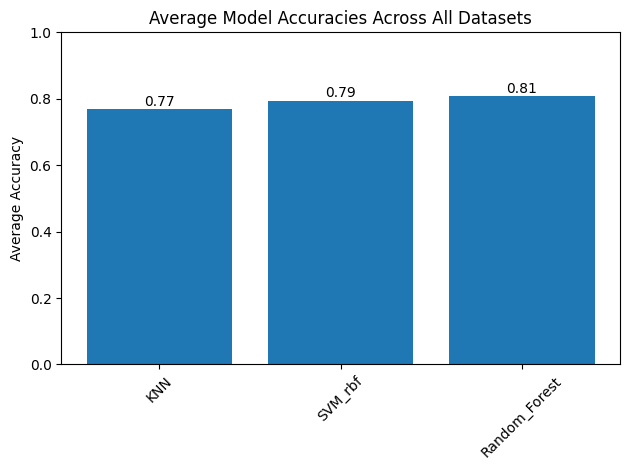

In [34]:
plot_accuracy_from_json()
